# Conociendo nuestros datos de ping√ºinos. üó∫üß≠üêß

## Instalar librer√≠as necesarias

```
!python3.10 -m venv venv
.\venv\Scripts\activate
En el notebook seleccionar el kernel de esta ambiente
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librer√≠as

In [8]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gr√°ficos

In [9]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

<h1 style="color: blue;">RECOLECCION DE DATOS</h1>


## Cargar los datos

### Utilizando el paquete palmerpenguins

Este paquete est√° dise√±ado principalmente para fines educativos y de demostraci√≥n de t√©cnicas de an√°lisis de datos.El paquete proporciona un conjunto de datos sencillo pero rico en informaci√≥n sobre tres especies de ping√ºinos: Adelie, Chinstrap y Gentoo, recolectados en tres islas de la regi√≥n ant√°rtica. Contiene caracter√≠sticas como la longitud del pico, la profundidad del pico, la longitud de las aletas, el peso corporal, el sexo y la isla de origen de cada ping√ºino.  
**Descripci√≥n:** Proporciona la versi√≥n cruda y sin procesar del conjunto de datos, tal como fue recolectada.  
**Caracter√≠sticas:**  
- Nombres de columnas menos amigables y m√°s t√©cnicos.
- Las unidades de medida pueden no estar claramente indicadas.
- Puede haber valores que necesiten ajustes (por ejemplo, errores tipogr√°ficos, inconsistencias en categor√≠as).
- Contiene datos adicionales que no est√°n en load_penguins() (potencialmente ruido o datos irrelevantes).  

**Uso principal:** Ideal para trabajos avanzados en los que quieras replicar el proceso de limpieza desde cero.

Datos crudos

In [10]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

Datos previamente procesados

La funci√≥n palmerpenguins.load_penguins() del paquete palmerpenguins carga el conjunto de datos de los ping√ºinos directamente en un formato de DataFrame de pandas. Este conjunto de datos contiene informaci√≥n sobre tres especies de ping√ºinos en la regi√≥n ant√°rtica: Adelie, Chinstrap y Gentoo.
**Descripci√≥n:** Proporciona una versi√≥n procesada y limpia del conjunto de datos.  
**Caracter√≠sticas:**  
- Las columnas tienen nombres amigables y legibles.
- Las unidades est√°n claras (por ejemplo, mil√≠metros y gramos).
- Algunas categor√≠as (como especies o islas) est√°n simplificadas.
- Datos estructurados como un DataFrame de pandas.
- Contiene los valores faltantes (NaN) para reflejar la realidad de los datos, pero organizados para facilitar su an√°lisis.

**Uso principal:** Ideal para an√°lisis exploratorios y aprendizaje b√°sico de preprocesamiento.

In [11]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando los conjuntos de datos de seaborn

In [12]:
preprocessed_penguins_df = sns.load_dataset("penguins")

### Utilizando conjuntos de datos de un dataset.csv

- Conjunto de datos crudos.

La funci√≥n pd.read_csv de la biblioteca pandas se utiliza para leer archivos CSV (Comma-Separated Values) y convertirlos en un DataFrame, que es una estructura tabular de datos muy utilizada en Python para an√°lisis y manipulaci√≥n.

In [13]:
raw_penguins_df2 = pd.read_csv('penguins_raw.csv')
raw_penguins_df2

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

- Conjunto de datos previamente procesados.

In [14]:
preprocessed_penguins_df2 = pd.read_csv('penguins.csv')
preprocessed_penguins_df2

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]


<h1 style="color: blue;">ANALISIS TIPO VARIABLES, LIMPIEZA Y VALIDACION</h1>

## ¬øQu√© tipo de dato son las variables del conjunto de datos?

El atributo dtypes en un DataFrame de pandas se utiliza para inspeccionar los tipos de datos de cada columna. 

In [15]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## ¬øCu√°ntas variables de cada tipo de dato tenemos en el conjunto de datos?

preprocessed_penguins_df.dtypes.value_counts()

Este codigo lo que hace es obtener un resumen de cu√°ntas columnas en el DataFrame, ya que cuenta cu√°ntas veces aparece cada tipo de dato en la serie obtenida.

In [16]:
preprocessed_penguins_df.dtypes.value_counts()

float64    4
object     3
dtype: int64

## ¬øCu√°ntas variables y observaciones tenemos en el conjunto de datos?

El atributo shape de un DataFrame de pandas devuelve las dimensiones del DataFrame en forma de una  
 tupla: (filas, columnas)

In [17]:
preprocessed_penguins_df.shape

(344, 7)

## ¬øExisten valores nulos explicitos en el conjunto de datos?

preprocessed_penguins_df.isnull().any() detecta la presencia de valores nulos (NaN) en cada columna del DataFrame. 

preprocessed_penguins_df.isnull():
Devuelve un DataFrame del mismo tama√±o que el original, pero con valores booleanos:
- True donde haya valores nulos (NaN).
- False donde no haya valores nulos.  

.any():
Se aplica a cada columna y devuelve True si alg√∫n valor es nulo en esa columna.
Si no hay valores nulos en una columna, devuelve False.

In [18]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## De tener observaciones con valores nulos, ¬øcu√°ntas tenemos por cada variable?

preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)  
sirve para identificar cu√°ntos valores nulos (NaN) hay en cada columna del DataFrame y ordenarlos de mayor a menor cantidad.

In [19]:
preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

## ¬øCu√°ntos valores nulos tenemos en total en el conjunto de datos?

preprocessed_penguins_df.isnull().sum().sum() sirve para calcular el n√∫mero total de valores nulos (NaN) en todo el DataFrame.

In [20]:
preprocessed_penguins_df.isnull().sum().sum()


19

## ¬øCu√°l es la proporci√≥n de valores nulos por cada variable?

Desglose del c√≥digo  

preprocessed_penguins_df.isnull():  
Genera un DataFrame booleano donde,  
True: indica que un valor es nulo (NaN).  
False: indica que no es nulo.
Ejemplo:

| Species | Bill Length (mm) | Sex   |
|---------|-------------------|-------|
| False   | False            | False |
| False   | True             | False |
| False   | False            | True  |
 

.melt(value_name='missing'):
Convierte el DataFrame de formato ancho a formato largo(o derretido).  
Cada columna se convierte en una fila con dos columnas:
- variable: nombre de la columna original.
- missing: valores de True o False (si el valor es nulo o no).
Ejemplo tras aplicar .melt():

| Variable        | Missing |
|-----------------|---------|
| species         | False   |
| bill_length_mm  | False   |
| sex             | False   |
| species         | False   |
| bill_length_mm  | True    |
| sex             | False   |
| species         | False   |
| bill_length_mm  | False   |
| sex             | True    |    

.pipe(lambda df: (...)):

pipe se utiliza para encadenar operaciones. La funci√≥n lambda recibe el DataFrame derretido como df y lo utiliza como entrada para el siguiente paso (la visualizaci√≥n con Seaborn).  

sns.displot(...):

data=df: usa el DataFrame generado en pasos anteriores.  
y='variable': coloca el nombre de las columnas originales (variable) en el eje Y.  
hue='missing': colorea seg√∫n si los valores son True (nulos) o False (no nulos).  
multiple='fill': normaliza las barras para que muestren proporciones (porcentaje de valores nulos y no nulos).  
aspect=2: ajusta la relaci√≥n de aspecto del gr√°fico para hacerlo m√°s ancho.  

Prop√≥sito del c√≥digo  

Este c√≥digo produce un gr√°fico de barras apiladas normalizadas para visualizar la proporci√≥n de valores nulos (NaN) y no nulos en cada columna del DataFrame.

Salida esperada
Un gr√°fico generado por Seaborn con:

El eje Y mostrando los nombres de las columnas (variable).
Las barras divididas por colores:
Un color para valores no nulos (False).
Otro color para valores nulos (True).
Las barras escaladas como proporciones (suma = 1 para cada fila).

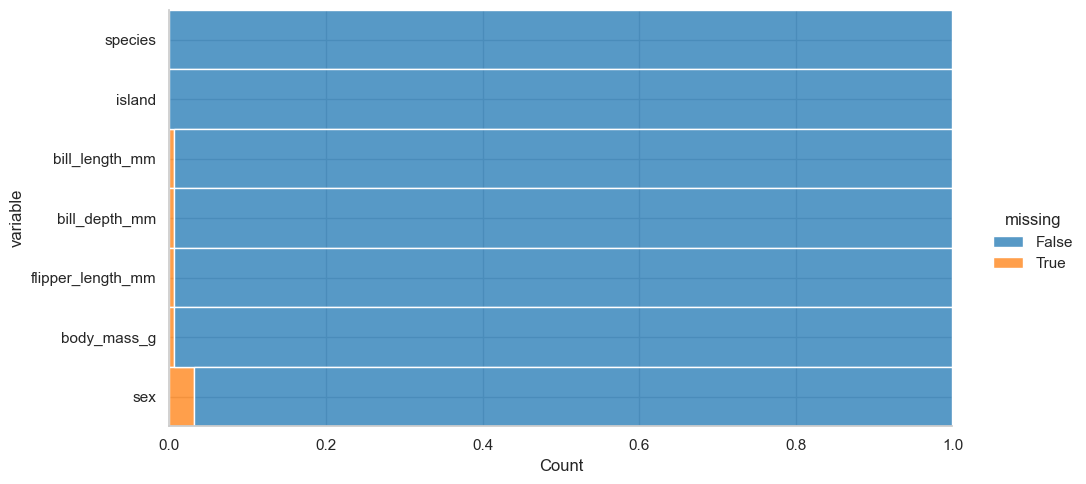

In [21]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¬øC√≥mo podemos visualizar los valores nulos en todo el conjunto de datos?

### Explicaci√≥n  
preprocessed_penguins_df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df))

### 1. `preprocessed_penguins_df.isnull()`

**Descripci√≥n:**

Este m√©todo genera un DataFrame booleano del mismo tama√±o que `preprocessed_penguins_df`, donde:
- `True` indica que el valor es **nulo** (`NaN`).
- `False` indica que el valor **no es nulo**.

**Ejemplo:**

| species | bill_length_mm | sex   |
|---------|----------------|-------|
| False   | False          | False |
| False   | True           | False |
| False   | False          | True  |

---

### 2. `.transpose()`

**Descripci√≥n:**

El m√©todo **`transpose()`** invierte las filas y columnas del DataFrame. Las **columnas** originales se convierten en **filas**, y las **filas** originales se convierten en **columnas**.

**Ejemplo:**  
Despu√©s de transponer el DataFrame, tendr√°s:

| species        | False | False | False |
|----------------|-------|-------|-------|
| bill_length_mm | False | True  | False |
| sex            | False | False | True  |

---

### 3. `.pipe(lambda df: sns.heatmap(data=df))`

**Descripci√≥n:**

- **`pipe()`**: Se utiliza para encadenar operaciones, pasando el DataFrame transpuesto a la siguiente funci√≥n (**`sns.heatmap()`**).
- **`sns.heatmap(data=df)`**: Genera un mapa de calor para visualizar la distribuci√≥n de los valores nulos:
  - Los valores **`True`** (nulos) se muestran con un color oscuro.
  - Los valores **`False`** (no nulos) se muestran con un color claro.

Estos nos muestra en el eje x los 344 pinguinos. Con lo cual podemos ver como dos de los pinguinos tiene una linea blanca bastamte alta, es decir que hay un pinguino con bastantes datos nulos. 

<AxesSubplot: >

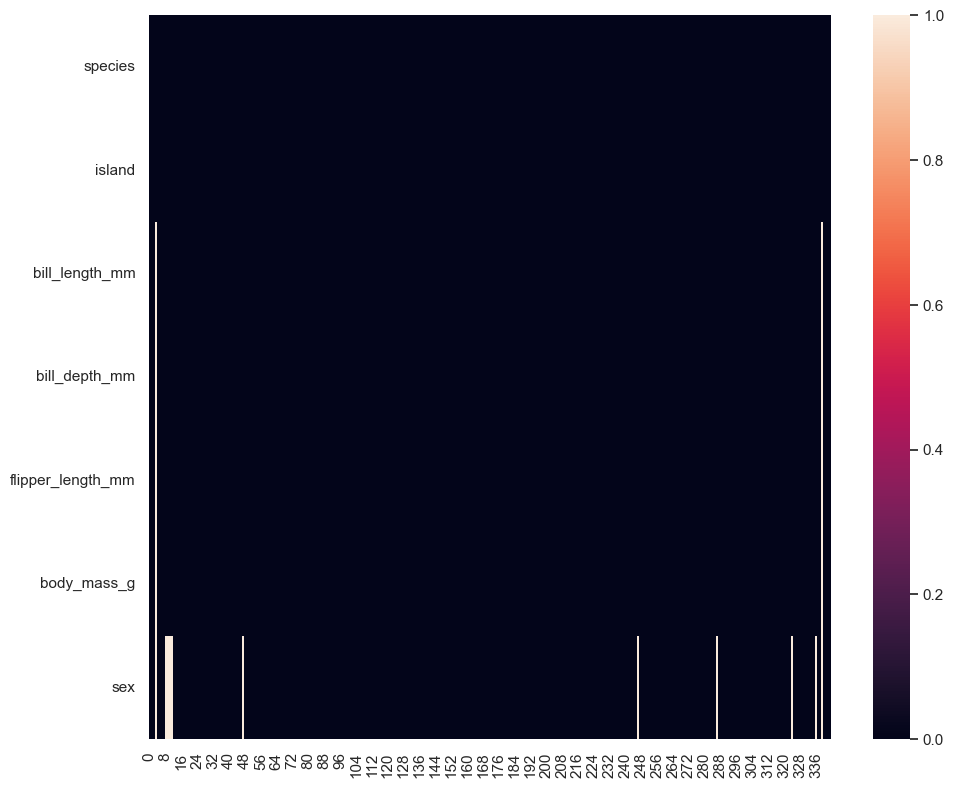

In [22]:
preprocessed_penguins_df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df))

## ¬øCu√°ntas observaciones perdemos si eliminamos los datos faltantes?


La decisi√≥n de **eliminar** o **mantener** los valores nulos depende de varios factores y del contexto del an√°lisis. Aqu√≠ se presentan los principales criterios que debes considerar:

---

### 1. **Porcentaje de valores nulos**
   - **Si una columna tiene un alto porcentaje de valores nulos**, puedes considerar eliminarla. Por ejemplo, si m√°s del **50%** de los valores son nulos, probablemente no aportar√° informaci√≥n √∫til.
   - Puedes calcular el porcentaje de valores nulos en cada columna con el siguiente c√≥digo:

     ```python
     preprocessed_penguins_df.isnull().mean() * 100
     ```

   - Si el porcentaje de valores nulos es bajo, puedes optar por imputarlos o dejarlos como est√°n.

---

### 2. **Impacto de eliminar los valores nulos**
   - **Eliminar filas con valores nulos** puede reducir significativamente el tama√±o de tu conjunto de datos, lo que podr√≠a afectar el rendimiento del modelo si las filas eliminadas son muchas.
   - **Eliminar columnas con valores nulos** puede ser √∫til si esas columnas no aportan valor, o si son demasiado problem√°ticas para ser imputadas de forma confiable.

---

### 3. **Tipo de variable**
   - **Para variables num√©ricas**: Si los valores nulos son pocos, puedes **imputarlos** con la **media**, **mediana** o **moda**, dependiendo de la distribuci√≥n de los datos.
   - **Para variables categ√≥ricas**: Si los valores nulos son pocos, puedes **rellenarlos** con la categor√≠a m√°s frecuente (moda), o si los nulos son demasiado frecuentes, podr√≠as eliminarlos.

---

### 4. **M√©todo de imputaci√≥n**
   - Si no deseas perder datos, puedes optar por **imputar** los valores nulos en lugar de eliminarlos. Algunas estrategias comunes son:
     - **Imputaci√≥n con la media**, **mediana** o **moda**.
     - **Imputaci√≥n con modelos predictivos** como regresi√≥n o **k-NN** para predecir los valores nulos basados en otras variables.

---

### 5. **Dependencia del modelo**
   - Algunos modelos (como **√Årboles de Decisi√≥n**, **Random Forest**, **XGBoost**) pueden manejar valores nulos de forma autom√°tica durante el entrenamiento.
   - Otros modelos (como **Regresi√≥n Lineal**, **k-NN**) requieren que los valores nulos sean manejados expl√≠citamente, ya sea eliminando las filas/columnas o imputando los valores.

---

### 6. **Objetivo del an√°lisis**
   - Si el an√°lisis es exploratorio, puedes **imputar** los valores nulos para no perder informaci√≥n valiosa.
   - Si el objetivo es construir un modelo predictivo de alta precisi√≥n, puede ser m√°s adecuado **eliminar los nulos** o usar un enfoque de imputaci√≥n m√°s sofisticado.

---

### 7. **Correlaci√≥n con otras variables**
   - Si los valores nulos est√°n correlacionados con otras variables, esto podr√≠a indicar que los nulos tienen un significado especial, y en este caso, deber√≠as **investigar m√°s a fondo** antes de eliminar o imputar.
   - Si se puede, rellena los nulos con valores derivados de otras variables.

---

### Resumen de opciones:

| **Opci√≥n**                        | **Cu√°ndo usarla**                                                                                  |
|------------------------------------|----------------------------------------------------------------------------------------------------|
| Eliminar columnas/filas con nulos  | Si la columna tiene muchos nulos (m√°s del 50%) o si no aporta valor significativo.               |
| Imputar valores nulos             | Si los nulos son pocos y puedes reemplazarlos con valores representativos (media, mediana, moda).  |
| Dejar los nulos                   | Si el modelo o an√°lisis puede manejar nulos sin perder rendimiento o si los nulos son significativos. |
| Rellenar con una categor√≠a        | Si la variable es categ√≥rica y los valores nulos representan una categor√≠a significativa.         |

---

dropna() elimina todas las filas del DataFrame que contienen al menos un valor nulo (NaN).  
Si una fila tiene un valor nulo en cualquier columna, esa fila ser√° eliminada del DataFrame.  
Si no hay filas con valores nulos, el DataFrame no se modificar√°.  
En este caso, hay 11 filas que contienen valores nulos. Pasado de 344 a 333 filas.

In [23]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

<h1 style="color: blue;">ANALISIS UNIVARIADO</h1>

# Explorando nuestras variables numericas y categoricas

### Para obtener algunos estadisticos de todas las variables

### Usamos `processed_penguins_df.describe(include='all')`

El m√©todo `describe()` en Pandas se utiliza para obtener un resumen estad√≠stico del DataFrame, proporcionando informaci√≥n sobre la distribuci√≥n y las caracter√≠sticas de las columnas num√©ricas y categ√≥ricas. Al pasar `include='all'` como par√°metro, el m√©todo genera estad√≠sticas tanto para las columnas num√©ricas como para las no num√©ricas (categ√≥ricas).

---

### 1. **`processed_penguins_df.describe()`**
   - Por defecto, `describe()` solo calcula estad√≠sticas descriptivas para las **columnas num√©ricas**.
   - Para las columnas num√©ricas, proporciona informaci√≥n como:
     - **count**: N√∫mero de valores no nulos.
     - **mean**: Media de los valores.
     - **std**: Desviaci√≥n est√°ndar.
     - **min**: Valor m√≠nimo.
     - **25%**: Primer cuartil (percentil 25).
     - **50%**: Mediana (percentil 50).
     - **75%**: Tercer cuartil (percentil 75).
     - **max**: Valor m√°ximo.

---

### 2. **`processed_penguins_df.describe(include='all')`**
   - Al incluir `include='all'`, el m√©todo tambi√©n calcula estad√≠sticas para **columnas categ√≥ricas**.
   - Para las columnas categ√≥ricas, proporciona informaci√≥n como:
     - **count**: N√∫mero de valores no nulos.
     - **unique**: N√∫mero de categor√≠as √∫nicas en la columna.
     - **top**: La categor√≠a m√°s frecuente.
     - **freq**: Frecuencia de la categor√≠a m√°s frecuente.

---

### 3. **Ejemplo**
   Si tienes un DataFrame `processed_penguins_df` con columnas tanto num√©ricas como categ√≥ricas (por ejemplo, "species" y "bill_length_mm"), al usar `describe(include='all')`, obtendr√°s estad√≠sticas para ambas, como se muestra en el siguiente ejemplo:

```python
processed_penguins_df.describe(include='all')

In [24]:
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    333.000000   333  
unique          NaN     2  
top             NaN  Male  
freq            NaN   168  
mean    4207.057057   NaN  
std      805.215802   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4775.000000   NaN  
max     6300.000000   NaN

### Si queremos solo las num√©ricas

In [25]:
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

## Tabulaci√≥n

### 1. **¬øQu√© es la tabulaci√≥n?**
   - Es el proceso de contar cu√°ntas veces aparece cada valor √∫nico en una variable categ√≥rica.
   - Es una herramienta fundamental para el an√°lisis exploratorio de datos, ya que proporciona una visi√≥n r√°pida de la composici√≥n de una columna o categor√≠a.

---

### 2. **Ejemplo de tabulaci√≥n**

Supongamos que tenemos una variable `species` con los siguientes datos:

| Variable: Species | 
|-------------------|
| Adelie            |
| Adelie            |
| Adelie            |
| Adelie            |
| Adelie            |
| Adelie            |
| Gentoo            |
| Gentoo            |
| Gentoo            |
| Gentoo            |
| Gentoo            |
| Chinstrap         |
| Chinstrap         |
| Chinstrap         |

El resultado de la **tabulaci√≥n** ser√≠a:

| Species   | Count |
|-----------|-------|
| Adelie    | 6     |
| Gentoo    | 5     |
| Chinstrap | 3     |

---

### 3. **Representaci√≥n gr√°fica**
   - La informaci√≥n tabulada puede representarse f√°cilmente en un gr√°fico de barras para visualizar la frecuencia de cada categor√≠a.
   - En la imagen, el gr√°fico de barras muestra:
     - Adelie con una frecuencia de 6.
     - Gentoo con una frecuencia de 5.
     - Chinstrap con una frecuencia de 3.

### Si queremos solo categ√≥ricas v1

In [26]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

### Solo categ√≥ricas v2

Tambien podemos convertir object en un nombre personalizado como category

In [27]:
(
    processed_penguins_df
    .astype(
        {
            'species': 'category', #Convierte el tipo de Object a category
            'island': 'category',  #Convierte el tipo de Object a category
            'sex': 'category'      #Convierte el tipo de Object a category
        }
    )
    .describe(include=['category', object])
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

### Pandas (barras verticales)

<AxesSubplot: >

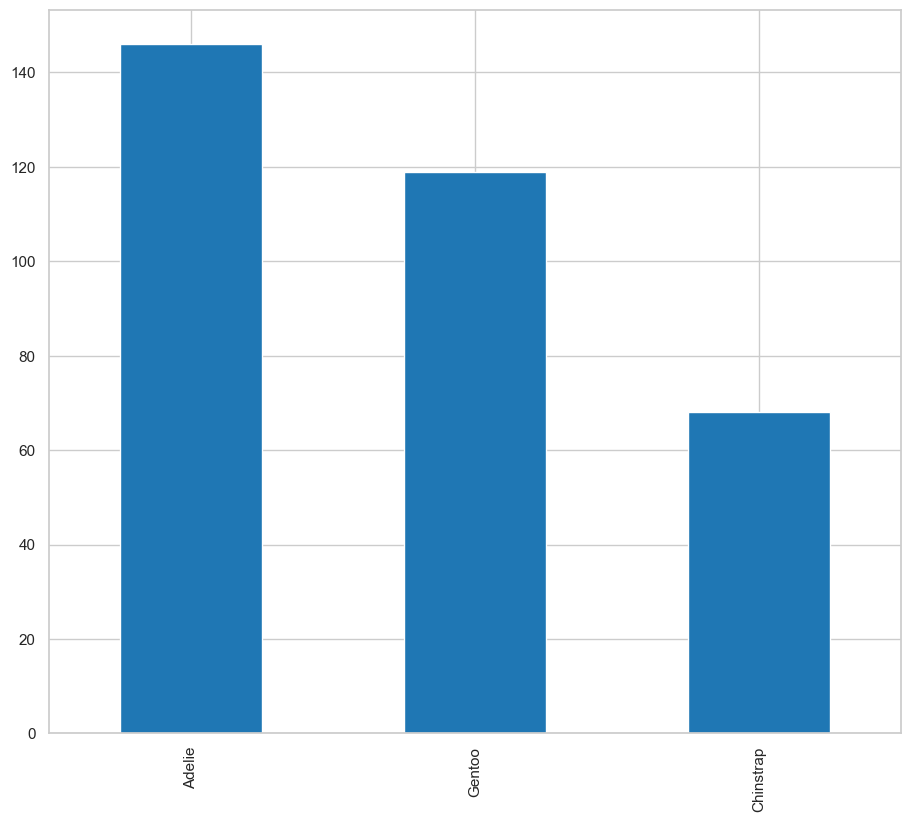

In [28]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        # color=penguin_color.values()
    )
)

### Seaborn (barras verticales con catplot)

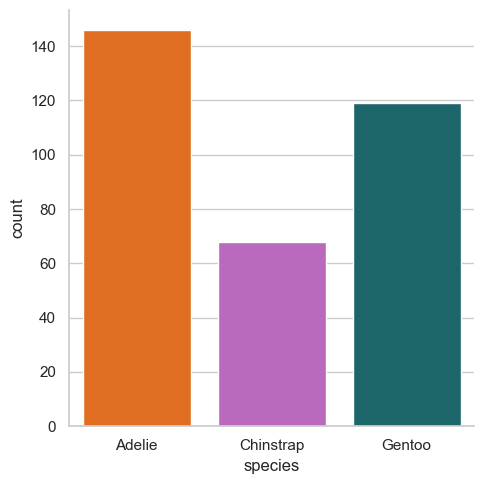

In [29]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color,
    # order=processed_penguins_df.value_counts('species', sort=True).index
)

## pandas y Seaborn (barras verticales con barplot) 

<AxesSubplot: xlabel='species', ylabel='count'>

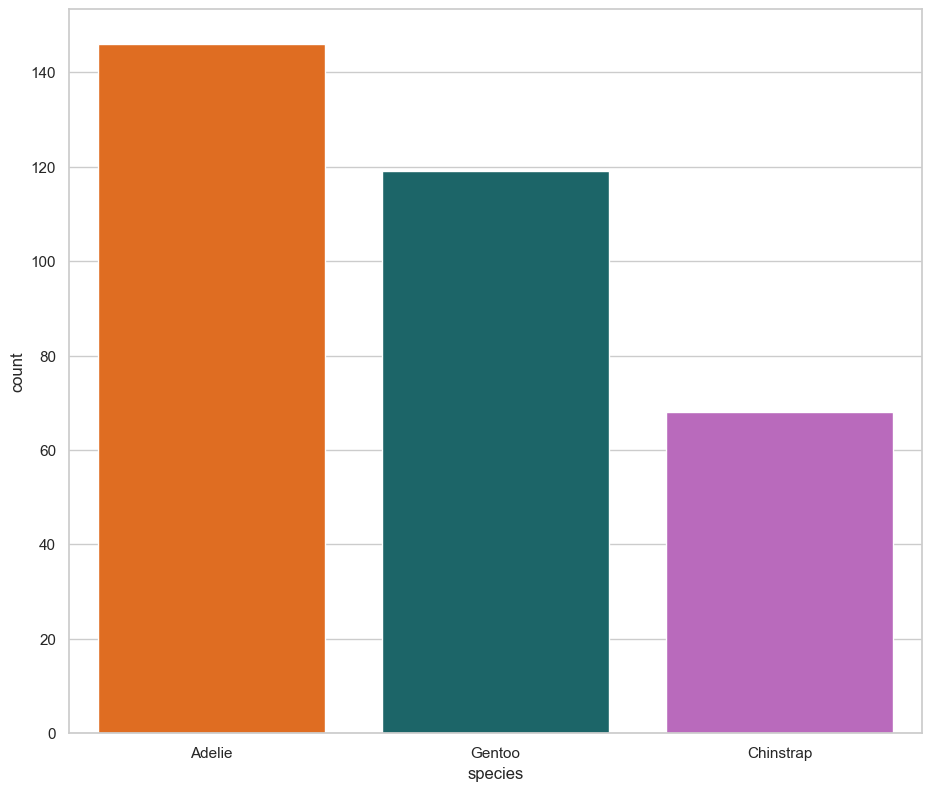

In [30]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

### ¬øC√≥mo visualizar las proporciones?

## pandas y Seaborn (barras verticales con displot) 

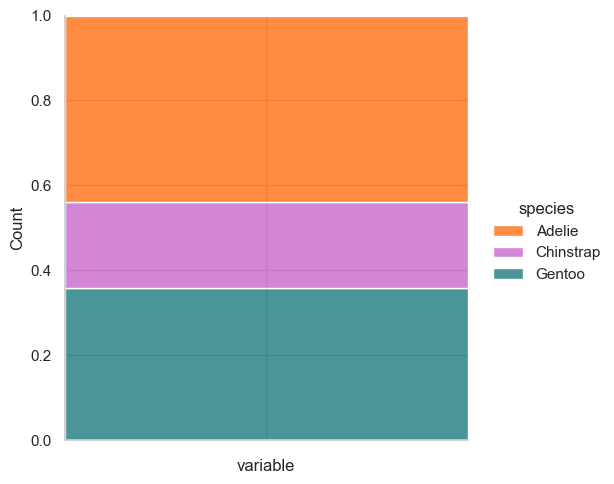

In [31]:
(
    processed_penguins_df
    .add_column('variable', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

# Medidas de tendencia central
### ¬øQu√© son las medidas de tendencia central?

Las **medidas de tendencia central** son valores estad√≠sticos que describen el punto central o promedio de un conjunto de datos. Estas medidas ayudan a resumir un conjunto de datos indicando d√≥nde "tienden a concentrarse" los valores.

---

### Principales medidas de tendencia central

1. **Media**:
   - Es el promedio aritm√©tico de los datos.
   - Se calcula sumando todos los valores y dividi√©ndolos por el n√∫mero total de observaciones.
   - **F√≥rmula**:  
     \[
     \text{Media} = \frac{\sum_{i=1}^{n} x_i}{n}
     \]
   - **Ejemplo**: Si los datos son 2, 4, 6, la media es:
     \[
     \text{Media} = \frac{2 + 4 + 6}{3} = 4
     \]

2. **Mediana**:
   - Es el valor que divide el conjunto de datos en dos partes iguales, cuando los datos est√°n ordenados de menor a mayor.
   - Si el n√∫mero de observaciones es impar, es el valor central; si es par, es el promedio de los dos valores centrales.
   - **Ejemplo**:
     - Datos: 2, 4, 6 ‚Üí **Mediana**: 4.
     - Datos: 2, 4, 6, 8 ‚Üí **Mediana**: (4 + 6) / 2 = 5.

3. **Moda**:
   - Es el valor que m√°s se repite en el conjunto de datos.
   - **Ejemplo**:
     - Datos: 1, 2, 2, 3 ‚Üí **Moda**: 2.
     - Datos: 1, 1, 2, 2, 3 ‚Üí **Moda**: 1 y 2 (distribuci√≥n bimodal).

---

### ¬øPor qu√© son importantes?
Las medidas de tendencia central son fundamentales para:
- **Resumir datos**: Facilitan la interpretaci√≥n al reducir grandes conjuntos de datos a un √∫nico valor representativo.
- **Comparar grupos**: Ayudan a comparar diferentes conjuntos de datos entre s√≠.
- **Tomar decisiones**: Proveen un punto de referencia para identificar patrones o tendencias.

---

### Consideraciones:
- **Media**:
  - Es sensible a valores extremos (outliers), que pueden sesgar el resultado.
- **Mediana**:
  - Es m√°s robusta frente a valores extremos.
- **Moda**:
  - Es √∫til para datos categ√≥ricos o distribuciones no uniformes.

## Media o promedio

Usando pandas

In [32]:
processed_penguins_df.bill_depth_mm.mean(numeric_only=True)

17.164864864864864

Usando numpy

In [33]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864864

Usando pandas para todas las variables numericas

In [34]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

## Mediana

In [35]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

## Moda

In [36]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  
0       3800.0  Male

In [37]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

# Medidas de dispersi√≥n
### ¬øQu√© son las medidas de dispersi√≥n?

Las **medidas de dispersi√≥n** son herramientas estad√≠sticas que describen **c√≥mo se distribuyen o var√≠an los datos** en un conjunto respecto a su valor central (media, mediana, etc.). Estas medidas complementan a las **medidas de tendencia central** al mostrar la **variabilidad** o **consistencia** de los datos.

---

### Principales medidas de dispersi√≥n

1. **Rango**:
   - Es la diferencia entre el valor m√°ximo y el valor m√≠nimo.
   - **F√≥rmula**:
     \[
     Rango = \text{M√°ximo} - \text{M√≠nimo}
     \]
   - **Ejemplo**: Si los datos son [3, 7, 8, 15], el rango es:
     \[
     15 - 3 = 12
     \]

2. **Varianza**:
   - Mide la **variabilidad promedio** de los datos respecto a la media.
   - Calcula la diferencia cuadrada entre cada dato y la media, promediando estos valores.
   - **F√≥rmula**:
     Varianza (œÉ¬≤) = [Œ£ (x·µ¢ - xÃÑ)¬≤] / n

3. **Desviaci√≥n est√°ndar**: La desviaci√≥n est√°ndar es una medida que indica cu√°nto se dispersan o se alejan los valores de un conjunto de datos respecto al valor promedio (media).  

   - Si la desviaci√≥n est√°ndar es baja, significa que los valores est√°n cerca de la media.  
   - Si la desviaci√≥n est√°ndar es alta, significa que los valores est√°n m√°s dispersos o alejados de la media.  
   - Es la **ra√≠z cuadrada de la varianza**, lo que permite interpretar la variabilidad en las mismas unidades que los datos originales.
   - **F√≥rmula**:
     Desviaci√≥n est√°ndar (œÉ) = ‚àö(Varianza)

4. **Rango intercuart√≠lico (IQR)**:
   - Es la diferencia entre el tercer cuartil Q3 y el primer cuartil Q1.
   - Mide la dispersi√≥n en la parte central del conjunto de datos, ignorando valores extremos.
   - **F√≥rmula**:
     IQR = Q_3 - Q_1

---

### ¬øPor qu√© son importantes?

1. **Eval√∫an la consistencia de los datos**:
   - Un conjunto con menor dispersi√≥n tiene valores m√°s cercanos al promedio.
   - Un conjunto con mayor dispersi√≥n tiene valores m√°s dispersos.

2. **Identifican valores at√≠picos (outliers)**:
   - Ayudan a detectar datos extremos que podr√≠an distorsionar los an√°lisis.

3. **Comparan distribuciones**:
   - Permiten comparar la variabilidad de dos o m√°s conjuntos de datos.

<img src="imgs/medidas_dispersion.jpg" alt="desc1">
<img src="imgs/asimetria_estadistica.jpg" alt="desc2">
---

## ¬øCu√°l es el valor m√°ximo de las variables?

In [38]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

## ¬øCu√°l es el valor m√≠nimo de las variables?


In [39]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

## ¬øCu√°l es el rango de las variables?
La diferencia entre el maximo el minimo

In [40]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

## ¬øCu√°l es la desviaci√≥n est√°ndar de las variables?
En el caso de bill_length_mm la desviaci√≥n estandar es 5.46 mm. Si sabemos que el promedio es 43 mm.
Quiere decir que entre los topes minimo 38 y maximo 48 se encuentra el 68% de los datos.  

La **regla emp√≠rica** o **regla de los 68-95-99.7** se aplica a distribuciones normales (distribuciones de campana) y describe la cantidad de datos que se encuentran dentro de un cierto n√∫mero de desviaciones est√°ndar de la media.

### Regla de los 68-95-99.7:
- **Dentro de 1 desviaci√≥n est√°ndar** (¬±1œÉ) de la media:
  - Aproximadamente **68%** de los datos.
  
- **Dentro de 2 desviaciones est√°ndar** (¬±2œÉ) de la media:
  - Aproximadamente **95%** de los datos.
  
- **Dentro de 3 desviaciones est√°ndar** (¬±3œÉ) de la media:
  - Aproximadamente **99.7%** de los datos.

In [41]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

In [42]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

## ¬øCu√°l es el rango intercuart√≠lico?
Recuerda en el rango intercuartilico esta el 50% de los datos

In [43]:
processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [44]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

In [45]:
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [46]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

metric    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0

## ¬øC√≥mo puedo visualizar la distribuci√≥n de una variable?

### Histograma

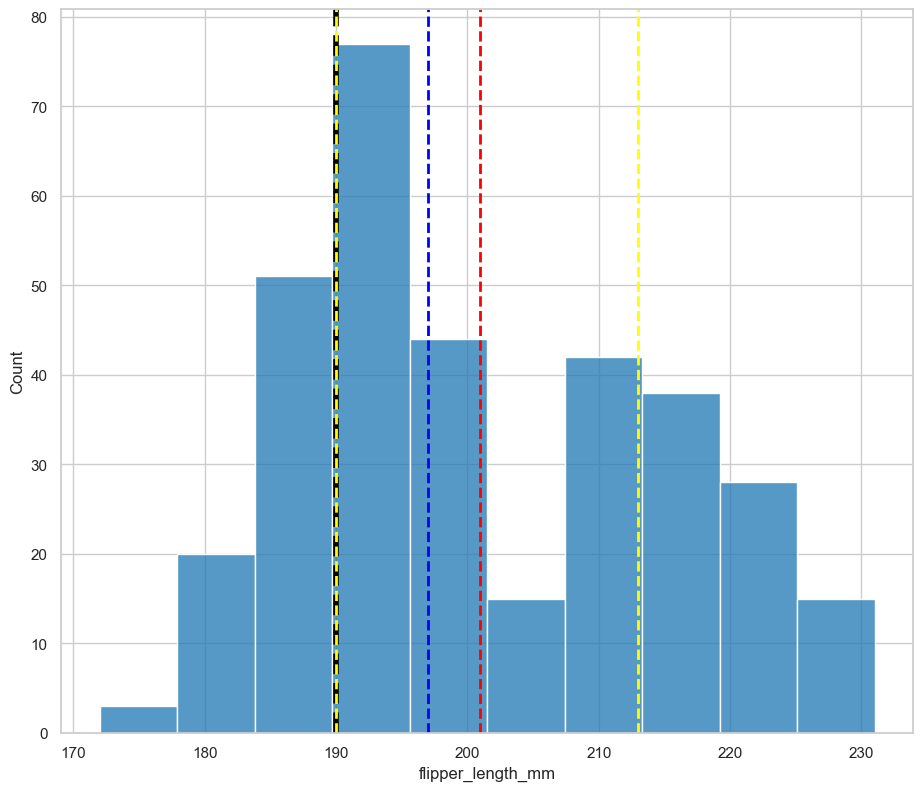

In [47]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
)

# Colocar una linea roja punteada que nos indique la media o promedio
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Colocar una linea azul punteada que nos indique la mediana
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

# Colocar una linea rnegra punteada que nos indique la moda
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

# Colocar una linea amarilla punteada que nos indique el q1
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# Colocar una linea amarilla punteada que nos indique el q3
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

## Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

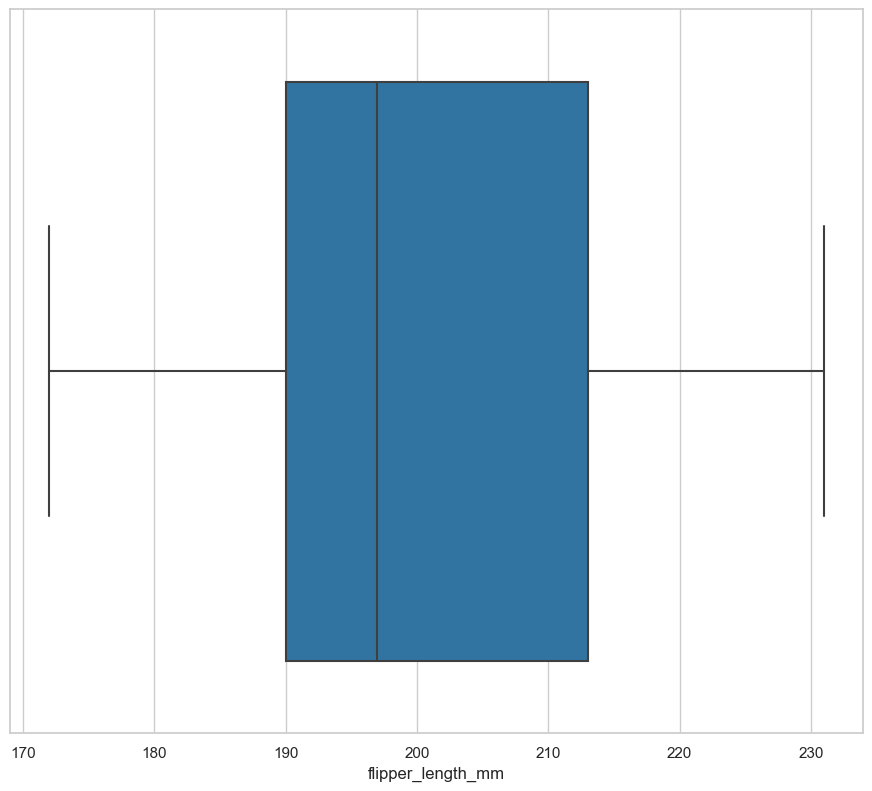

In [48]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

## Limitaciones


Este c√≥digo define una funci√≥n que calcula el ancho de banda √≥ptimo (o "bin width") para un histograma utilizando la regla de Freedman-Diaconis. La regla de Freedman-Diaconis se utiliza para determinar un buen ancho de las "barras" (bins) en un histograma, de manera que se pueda ver mejor la distribuci√≥n de los datos sin perder detalles.  
En seaborn podemos ingresar este parametro optimo con bindwith. En el caso de flipper_length_mm es 3.19

In [49]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75, numeric_only=True) - x.quantile(0.25, numeric_only=True)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

freedman_diaconis_bindwidth(processed_penguins_df)

bill_length_mm         1.372642
bill_depth_mm          0.467603
flipper_length_mm      3.469315
body_mass_g          184.778737
dtype: float64

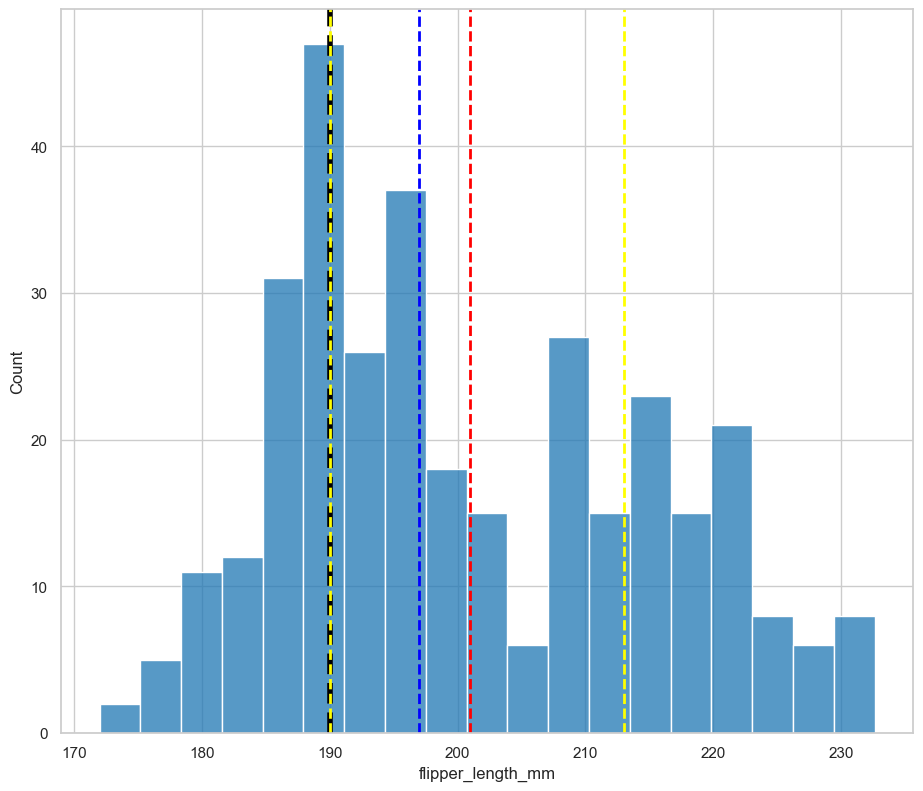

In [50]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=3.19
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# Distribuciones de probabilidad: PMFs, CDFs y PDFs
### 1. PMF (Funci√≥n de Masa de Probabilidad)
- **¬øQu√© es?**: La PMF se usa para describir distribuciones de variables **discretas**.
- **¬øQu√© hace?**: Muestra la probabilidad de que una variable aleatoria tome un valor espec√≠fico.
- **Ejemplo**: Si lanzas un dado, la PMF te dir√≠a la probabilidad de obtener un 1, un 2, etc.

### 2. CDF (Funci√≥n de Distribuci√≥n Acumulada)
- **¬øQu√© es?**: La CDF describe la probabilidad de que una variable aleatoria sea **menor o igual** a un valor espec√≠fico.
- **¬øQu√© hace?**: Muestra c√≥mo se acumulan las probabilidades a medida que avanzamos a trav√©s de los valores posibles de la variable.
- **Ejemplo**: Si lanzas un dado, la CDF te dir√≠a la probabilidad de obtener **1 o menos**, **2 o menos**, etc.

### 3. PDF (Funci√≥n de Densidad de Probabilidad)
- **¬øQu√© es?**: La PDF se usa para describir distribuciones de variables **continuas**.
- **¬øQu√© hace?**: Muestra la probabilidad de que una variable aleatoria tome un valor en un rango espec√≠fico. No te da la probabilidad exacta, sino la densidad de probabilidad.
- **Ejemplo**: Si mides la altura de personas, la PDF te dir√≠a la densidad de probabilidad de que alguien tenga una altura entre 1.70 m y 1.80 m.


## Funciones de probabilidad de masas (PMFs)
Cual es la probabilidad de que una variable tenga un valor determinado

### Utilizando seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

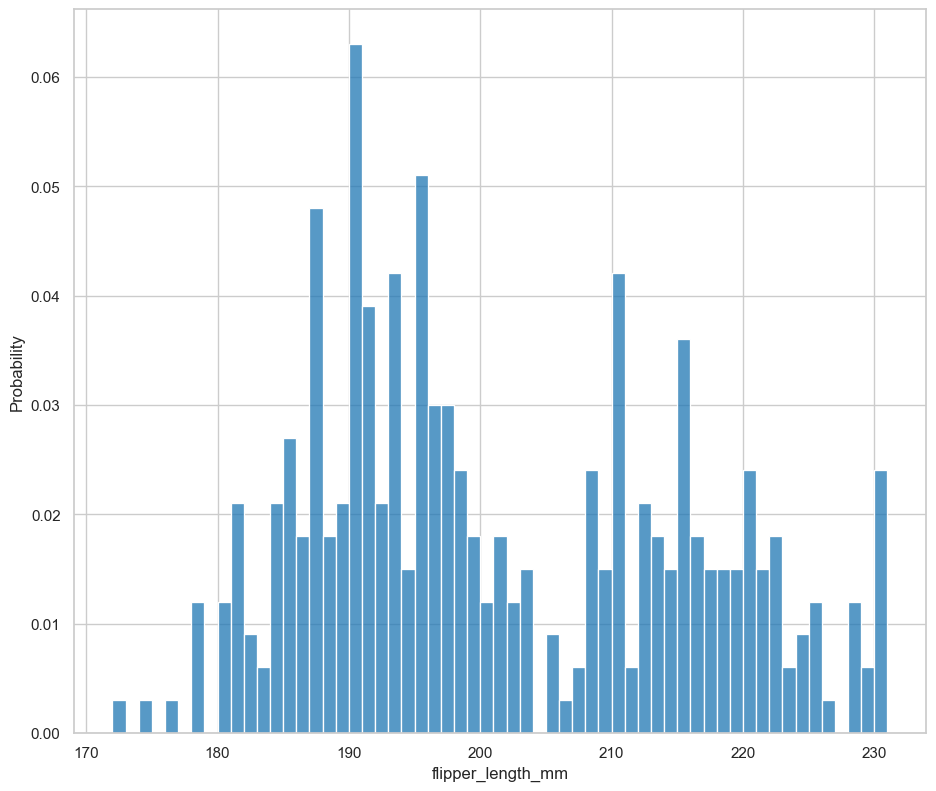

In [51]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando empiricaldist

In [52]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

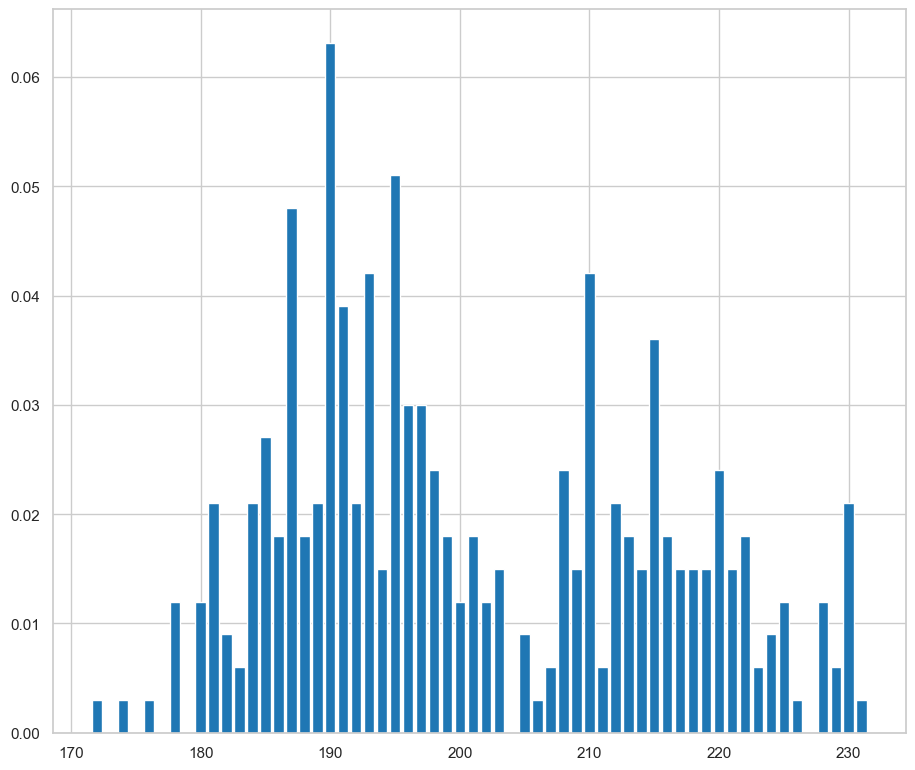

In [53]:
pmf_flipper_length_mm.bar()

In [54]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [55]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empir√≠cas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

Cual es la probabilidad de que un pinguino tenga longitud de aleta de 203mm o menos.  
R/ 0.6

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

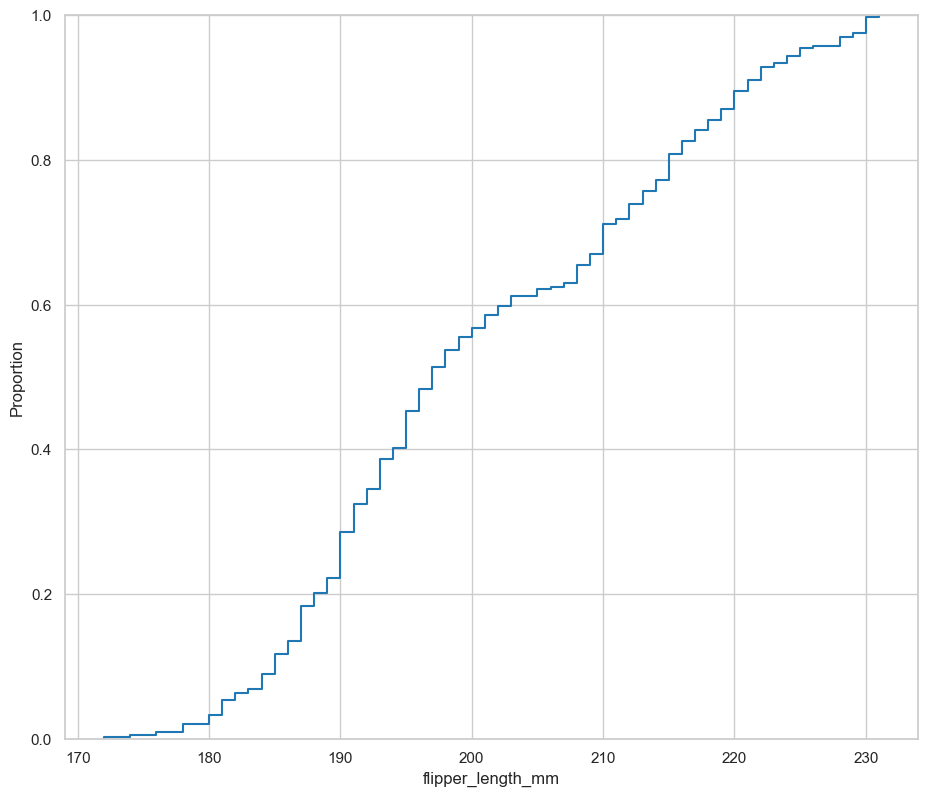

In [56]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

### Utilizando empiricaldist

In [57]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

200 0.5675675675675675


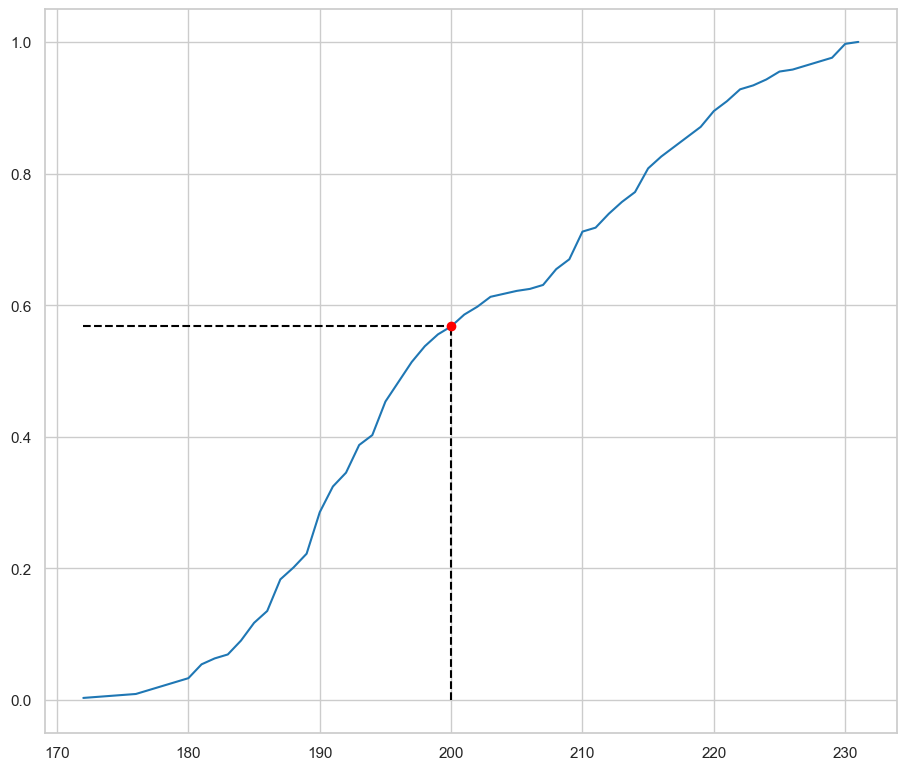

In [58]:
cdf_flipper_length_mm.plot()

q = 200 # Specify quantity
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
print(q,p)
plt.plot(q, p, 'ro') # punto rojo

En el siguiente ejemplo vamos a encontrar algo curioso. Es que si encontramos los valores que corresponden a las probabilidades 0.25 y 0.75, encontraremos el mismo rango intercuartilico.

[190. 213.] (0.25, 0.75)


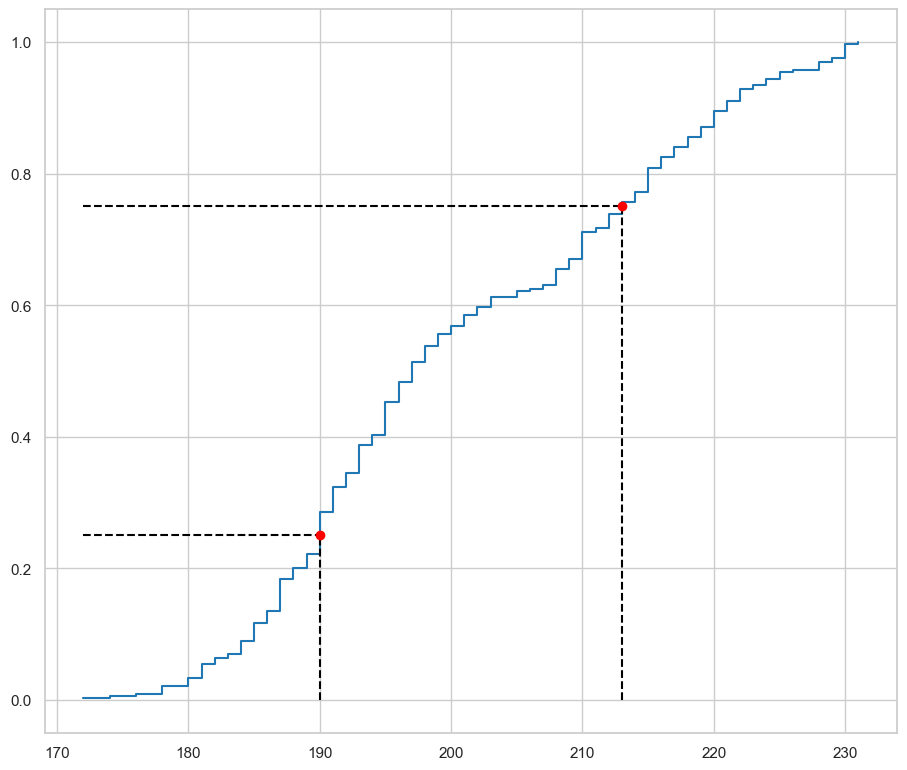

In [59]:
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

print(qs, ps)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

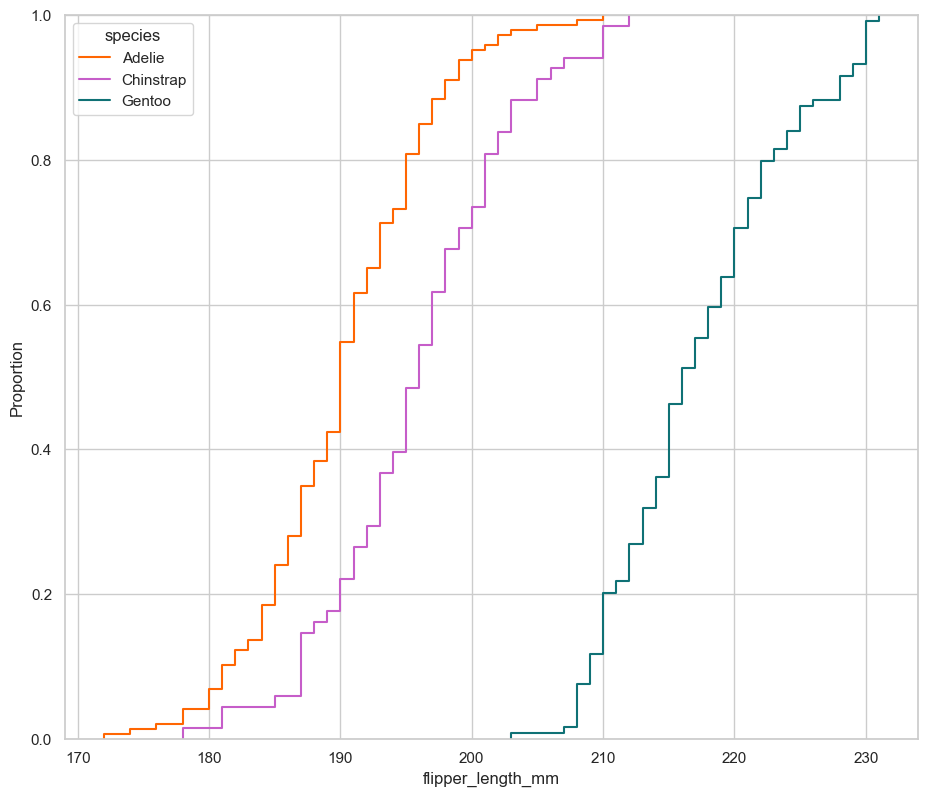

In [60]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad y usos
Similar al calculo del PMF, nos permite ver la probabilidad de los diferentes valores pero de manera continua (incluye decimales, o valores que incluso no tienen muestra).

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

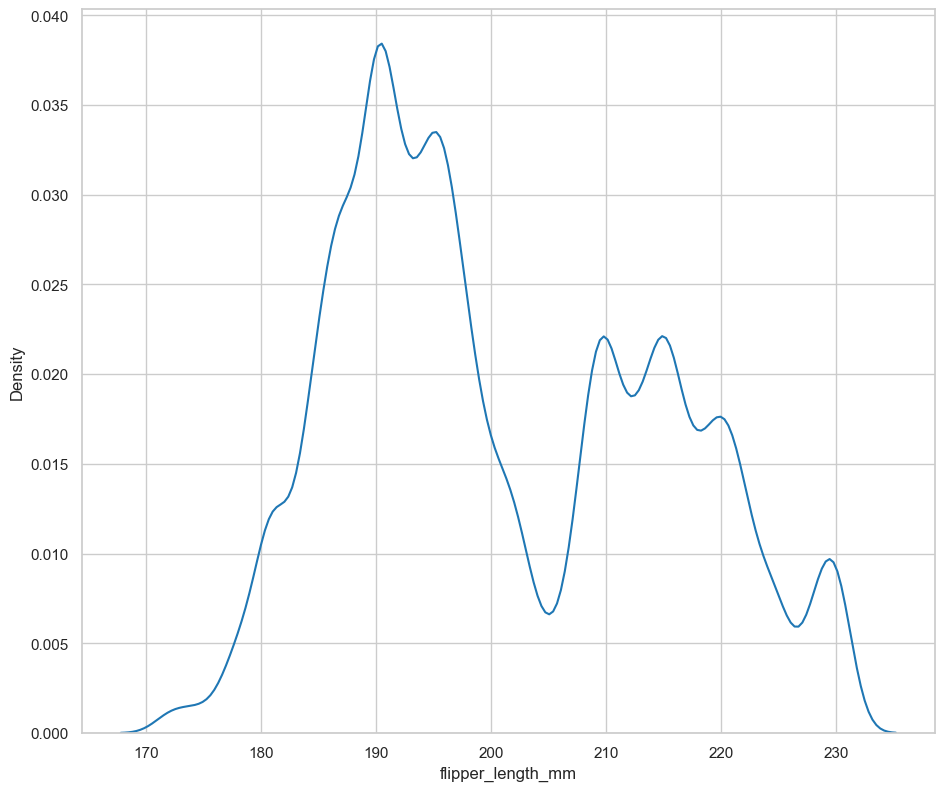

In [61]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

## Las PDF nos van a permitir hacer comparaciones con distribuciones normales.
Vamos hacer el siguiente ejercicio. A partir de los estadisticos que ya sabemos sacar con describe(), vamos a identificar el valor maximo y minimo de la variable body_mass_g. Con esto, vamos a poder generar una distribuci√≥n normal aleatoria por computadora y compararla con los datos reales. 

In [62]:
# Guardamos como clave, valor los resultados en la variable stats
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

A continuaci√≥n generamos un vector aleatorio de 42 muestras y estableciendo el max y min, para generar una cdf normal y compararla con la cdf real.

<AxesSubplot: >

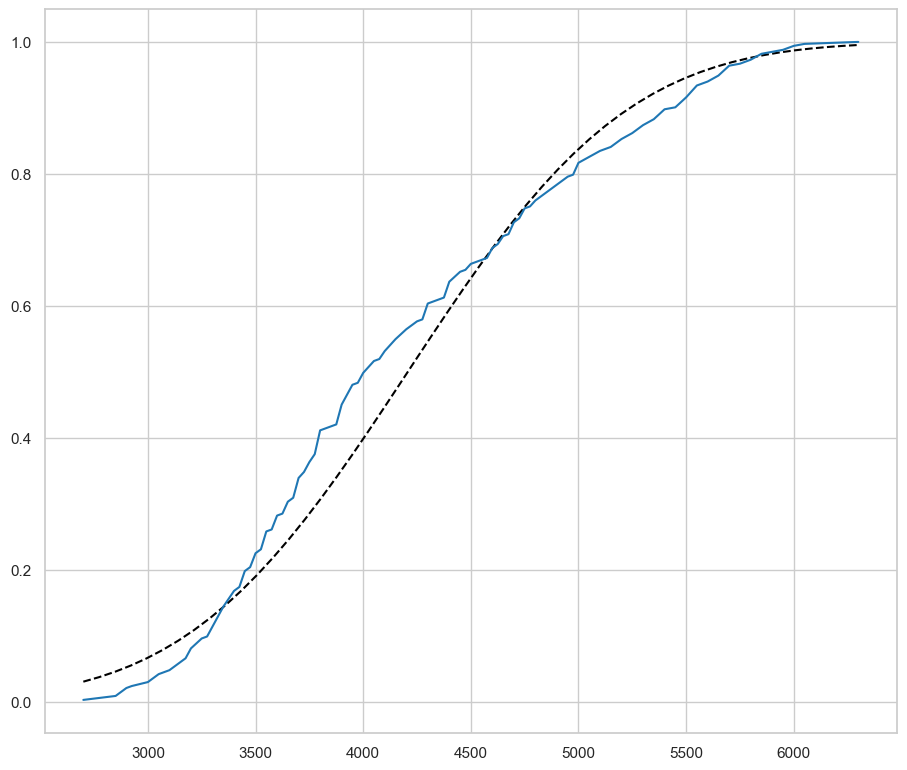

In [63]:
# CDF normal generada por computadora
np.random.seed(42)
# el 42 se le llama numero semilla y me garantiza que los numeros aleatorios 
# siempre sean los mismos y poder reproducir los mismos resultados.
# De hecho puede ser cualquier numero entero positovo o negativo, 
# pero 42 se ha vuelto popular en los programadores.

xs = np.linspace(stats['min'], stats['max'])
# Esta linea genera un vector de 50 muestras por defecto entre max y min
# Si queremos especificar 100 muestras, lo hacemos asi xs = np.linspace(stats['min'], stats['max'],100)
 
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
# scipy.stats.norm(stats['mean'], stats['std']) hasta aqu√≠ creamos una distribuci√≥n normal.
# .cdf(xs) calcula la funci√≥n de distribuci√≥n acumulativa (CDF) para cada valor en xs

plt.plot(xs, ys, color='black', linestyle='dashed') # Dibujamos las variables xs y ys

#CDF real
empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

Aqui se observa que la distribuci√≥n real de los datos no se comporta de manera normal.
Otra forma en que podemos hacer una comparaci√≥n es usando las PDF normal y PDF real.

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

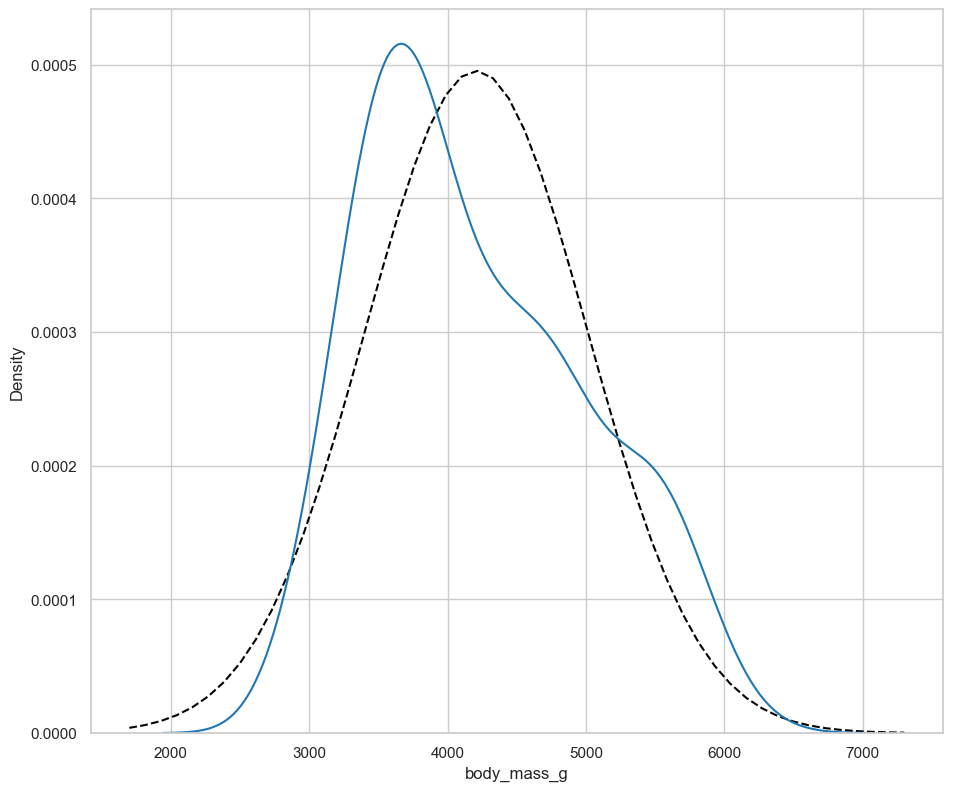

In [64]:
#PDF normal generada por computadora
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

#PDF real
sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

Aqu√≠ podemos ver que la distribuci√≥n real esta sesgada hacia la izquierda.

# Ley de los Grandes N√∫meros y Teorema del L√≠mite Central

## Ley de los Grandes N√∫meros  
Dice que, a medida que hacemos m√°s repeticiones de un experimento aleatorio (es decir, aumentamos el n√∫mero de muestras), el promedio de los resultados obtenidos se acerca al valor esperado o te√≥rico.

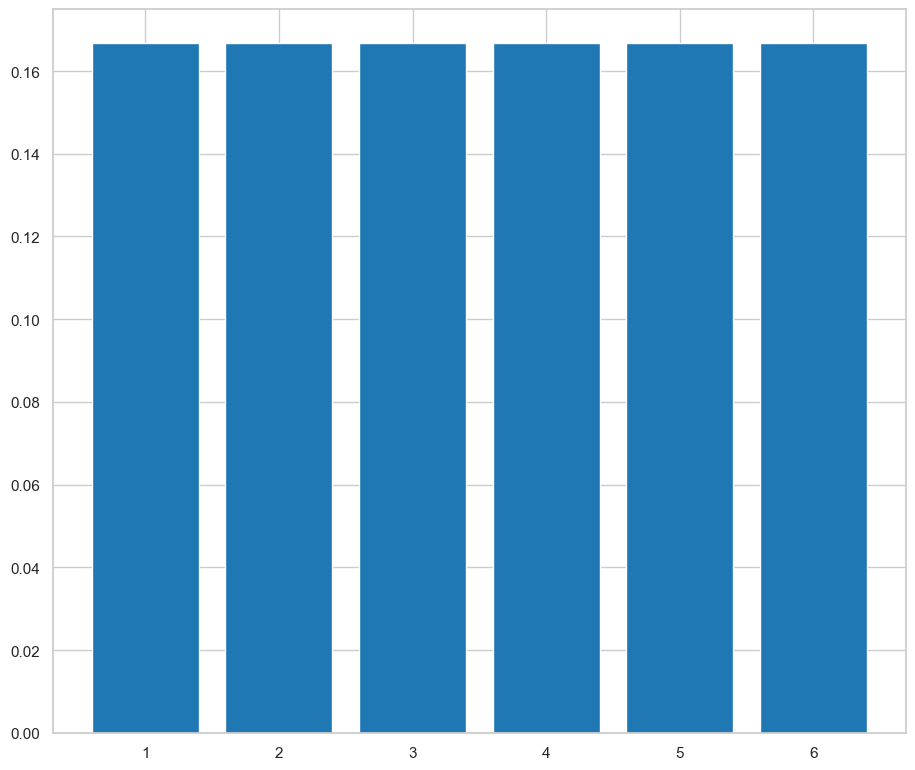

In [65]:
# Ingresamos a una funcion los 6 lados de un dado, y nos da que la probabilidad teorica es 1/6
# As√≠ la variable nos simula un dice (dado en en ingles)
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

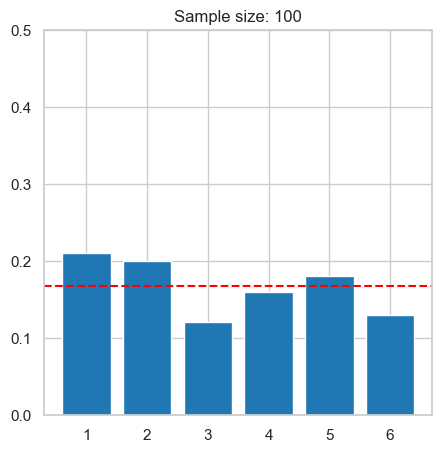

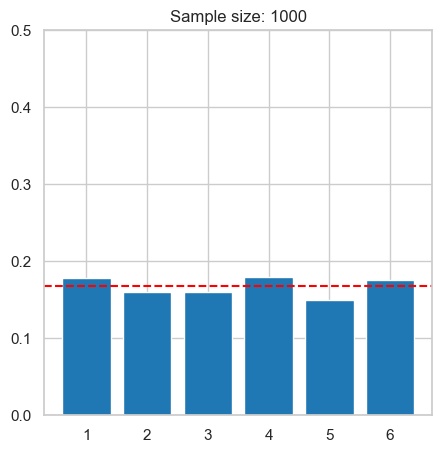

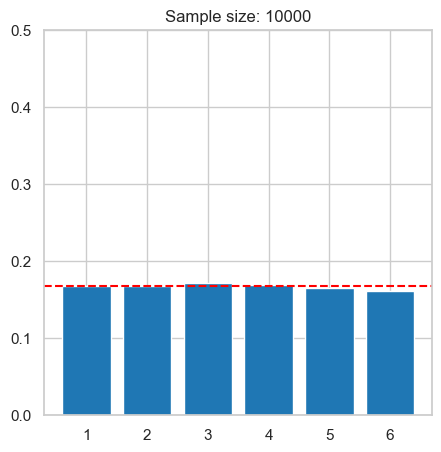

In [66]:
# Aqui vemos como funciona la probabilidad mientras aumentamos las muestras

# Se define una lista con tres tama√±os de muestra:
for sample_size in (1e2, 1e3, 1e4):# 10^2 = 100, 10^3 = 1000, y 10^4 = 10000.
    sample_size = int(sample_size) # Garantizamos que la variable sea entero
    values = dice.sample(sample_size) # Genera sample_size veces el lanzamiento de un dado
    sample_pmf = empiricaldist.Pmf.from_seq(values) #Los valores obtenidos los ingresamos a una pmf
    # Graficamos la PMF para 1e2, 1e3 y 1e4
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")
    
    #Podemos observar que entre mas grande el sample size, nos acercamos a la probabilidad teorica.


## Teorema del l√≠mite central

El Teorema del L√≠mite Central dice que, sin importar c√≥mo sea la distribuci√≥n original de los datos, si tomas suficientes muestras y calculas sus medias, esas medias seguir√°n una distribuci√≥n normal. Este teorema es clave para muchas t√©cnicas estad√≠sticas y hace que sea posible usar la distribuci√≥n normal en situaciones en las que no tenemos datos que sigan una distribuci√≥n normal.
Si tomas muchas muestras aleatorias de cualquier cosa (sin importar lo que sea) y calculas el promedio de cada una de esas muestras, esos promedios estar√°n cada vez m√°s cerca de seguir una forma de campana, es decir, una distribuci√≥n normal, cuando el tama√±o de la muestra sea grande.

### Ejemplo para entenderlo:

Imagina que tienes un dado. Los n√∫meros que puedes obtener son del 1 al 6, ¬øcierto? Si lanzas el dado una vez, obtienes un n√∫mero entre 1 y 6, sin un patr√≥n claro.

Ahora, imagina que lanzas el dado 10 veces, y calculas el promedio de esos 10 n√∫meros. Esa media ser√° un n√∫mero diferente a cada vez, pero si lo repites muchas veces, obtendr√°s promedios m√°s cercanos entre s√≠.

Si sigues haciendo esto, es decir, lanzando el dado much√≠simas veces y calculando siempre el promedio de cada grupo de 10 lanzamientos, ver√°s que esos promedios empiezan a formar una curva de campana (la famosa distribuci√≥n normal o "curva normal"), aunque el dado no sigue una distribuci√≥n normal por s√≠ mismo.

### ¬øPor qu√© esto pasa?

- Al principio, con pocas muestras (pocos lanzamientos), los promedios pueden ser muy diferentes entre s√≠.
- Pero cuando tienes muchas muestras (miles de lanzamientos), los promedios empiezan a agruparse alrededor de un valor central y se acercan a una forma de campana.

### ¬øQu√© significa esto?

1. **Cualquier dato puede dar una curva normal**: Aunque lo que est√°s midiendo no tenga una distribuci√≥n normal (como lanzar un dado), si tomas suficientes muestras y calculas los promedios, esos promedios formar√°n una curva normal.

2. **Con suficientes datos, todo se vuelve predecible**: Este teorema nos permite usar la distribuci√≥n normal para hacer predicciones, incluso si los datos originales no siguen una distribuci√≥n normal.

A partir de la variable sexo, que es una variable categorica de dos estados male o female, podemos crear una distribuci√≥n binomial que es donde se modela el n√∫mero de √©xitos en una secuencia de ensayos independientes y con la misma probabilidad de √©xito en cada ensayo.
Como male y female son variables categoricas y la distribuci√≥n binomial trabaja con numeros, podemos hacer un reemplazo de variables as√≠: male 1 y female 0.

La distribuci√≥n binomial se aproxima a una distribuci√≥n normal cuando el n√∫mero de ensayos es grande (esto se conoce como el Teorema del L√≠mite Central). Esto es muy util porque sin importar de que tipo de distribuci√≥n sean tus datos, puedes obtener una distribuci√≥n normal con la cual ya se puede trabajar hacerle todo tipo de preguntas interesantes

In [67]:
# processed_penguins_df.sex: Accede a la columna 'sex' del DataFrame 'processed_penguins_df'.

# value_counts(): Cuenta la frecuencia de cada valor √∫nico dentro de la columna 'sex'.
# Es decir, cu√°ntos 'Male' y cu√°ntos 'Female' hay en esa columna.

# normalize=True: Hace que, en lugar de devolver solo la cantidad de veces que aparece cada valor,
# devuelva la proporci√≥n (o frecuencia relativa) de cada valor respecto al total.

# En otras palabras, en vez de mostrar solo el n√∫mero de 'Male' y 'Female', 
# se mostrar√° el porcentaje que representa cada uno con respecto al total de valores en la columna.

# 51% machos y 49% hembras

processed_penguins_df.sex.value_counts(normalize=True)

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

In [68]:
# Reemplazamos la variable categorica sex por numeros 1 y 0

sex_numeric = processed_penguins_df.sex.replace(['Male', 'Female'], [1, 0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 333, dtype: int64

## N√∫mero de muestras id√≥neo

El n√∫mero de muestras **id√≥neo** depende de varios factores, como el tama√±o de la muestra individual, el tipo de datos y el prop√≥sito del an√°lisis. Sin embargo, hay algunas pautas generales que pueden ayudarte a determinar un n√∫mero adecuado de muestras para obtener resultados confiables.

### Factores a considerar:

1. **Tama√±o de la muestra individual (`sample_size`)**:
   - El tama√±o de cada muestra tiene un impacto significativo en la precisi√≥n de las estimaciones. Cuanto mayor sea el tama√±o de la muestra, m√°s confiables ser√°n las medias de las muestras y m√°s se ajustar√°n a una distribuci√≥n normal, como establece el **Teorema del L√≠mite Central**.
   - Idealmente, el tama√±o de la muestra deber√≠a ser lo suficientemente grande para que la distribuci√≥n de las medias de las muestras sea representativa de la poblaci√≥n. Para muchas situaciones, un tama√±o de muestra de **30 o m√°s** es suficiente para que las distribuciones muestren caracter√≠sticas normales (aunque esto puede variar dependiendo del tipo de datos).

2. **N√∫mero de muestras (`number_samples`)**:
   - El n√∫mero de muestras depende de la precisi√≥n deseada. Cuantas m√°s muestras tomes, m√°s preciso ser√° el valor promedio de las medias de las muestras. Sin embargo, hay un punto de **diminuci√≥n de rendimiento**: despu√©s de un n√∫mero determinado de muestras, agregar m√°s muestras no mejora significativamente los resultados.
   - Un buen punto de partida podr√≠a ser **1000 muestras**. Esto es suficiente para obtener una distribuci√≥n confiable de las medias de las muestras y verificar el Teorema del L√≠mite Central.
   - Si el n√∫mero de muestras es demasiado grande (por ejemplo, m√°s de **100,000 muestras**), puede que no veas una mejora significativa, y el proceso podr√≠a volverse m√°s lento sin aportar beneficios adicionales a la estimaci√≥n.

### Recomendaciones:

1. **Para un buen balance entre precisi√≥n y eficiencia**:
   - Un **n√∫mero de muestras entre 1000 y 10,000** es generalmente suficiente en la mayor√≠a de los casos. Esto es lo suficientemente grande como para obtener una distribuci√≥n estable y confiable sin sobrecargar el sistema de c√≥mputo.

2. **Para verificar el Teorema del L√≠mite Central**:
   - El n√∫mero de muestras puede ser **1000** o incluso **5000** dependiendo de la variabilidad de tus datos. Si la distribuci√≥n de tus datos es compleja, puedes necesitar m√°s muestras para observar claramente la convergencia hacia una distribuci√≥n normal.

3. **Si quieres una mayor precisi√≥n**:
   - Si tu objetivo es obtener estimaciones muy precisas de las medias de las muestras y est√°s dispuesto a comprometer m√°s tiempo de c√≥mputo, podr√≠as optar por un n√∫mero m√°s alto, como **50,000 o 100,000 muestras**.


In [69]:
#Teorema de limite central

number_samples = 1000 # tomamos mil muestras
sample_size=35 # cada muestra de 35 pinguinos

samples_df = pd.DataFrame() # Creamos un dataframe vac√≠o
samples_list = []           # Creamos una lista vac√≠a

np.random.seed(42) # Definimos una semilla para que los resultados sean reproducibles
for i in range(1, number_samples + 1): # repetimos 1000 veces
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy() #Toma una muestra aleatoria de 35 pinguinos
    # Crear un DataFrame temporal con la muestra y agregarlo a la lista
    sample_name = f"sample_{i}" # Le da un nombre unico a cada muestra
    temp_df = pd.DataFrame({sample_name: sex_numeric_sample})
    samples_list.append(temp_df)

# Concatenar todas las muestras de una vez, lo que evitar√° la fragmentaci√≥n
samples_df = pd.concat(samples_list, axis=1)
"""Beneficios de pd.concat():
    Eficiencia en memoria: Concatenar todas las columnas a la vez es m√°s eficiente que 
    agregar una por una, especialmente cuando se manejan grandes vol√∫menes de datos.
    Evitar el warning: Al evitar las m√∫ltiples asignaciones, el DataFrame no se fragmenta 
    internamente y no aparecer√° el warning de rendimiento.
"""

#samples_df.mean() calcula el promedio de cada muestra (es decir, el porcentaje de machos en cada muestra).
# .mean() sobre ese resultado calcula el promedio de todos los promedios, es decir, el promedio global de machos en la poblaci√≥n estimada.
male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

# Un valor de 0 indicar√≠a que todos los ping√ºinos en la muestra son hembras.
# Un valor de 1 indicar√≠a que todos los ping√ºinos en la muestra son machos.
# Un valor de 0.6 indicar√≠a que el 60% de los ping√ºinos en la muestra son machos.

Estimated percentage of male penguins in population is: 50.4457%


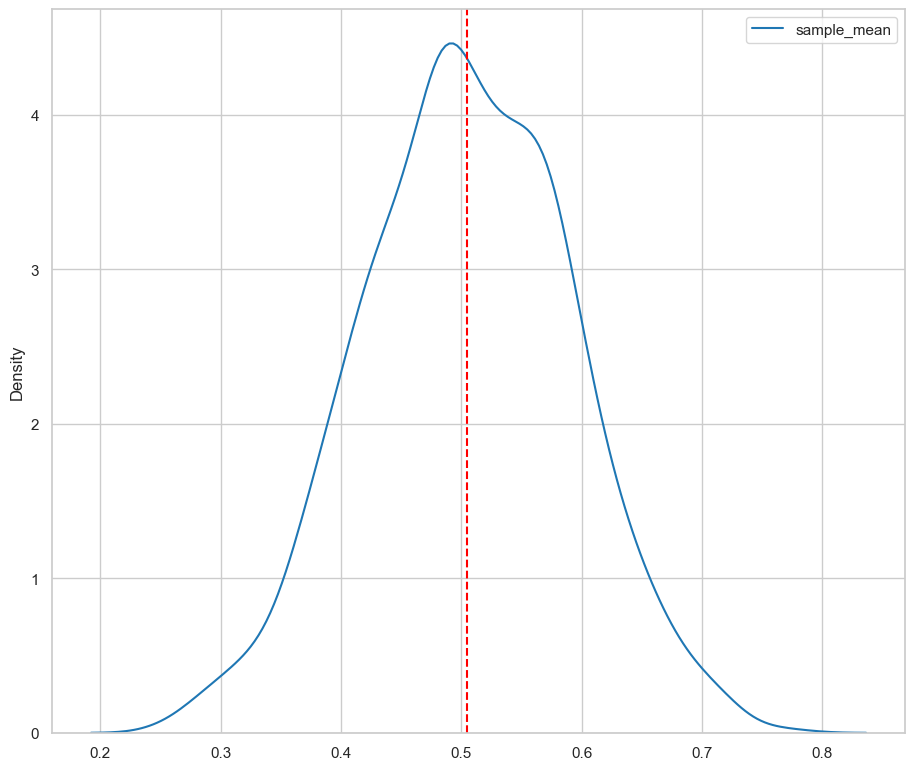

In [70]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial, bw_adjust=1) #El par√°metro bw (ancho de banda) controla la suavidad de la estimaci√≥n
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

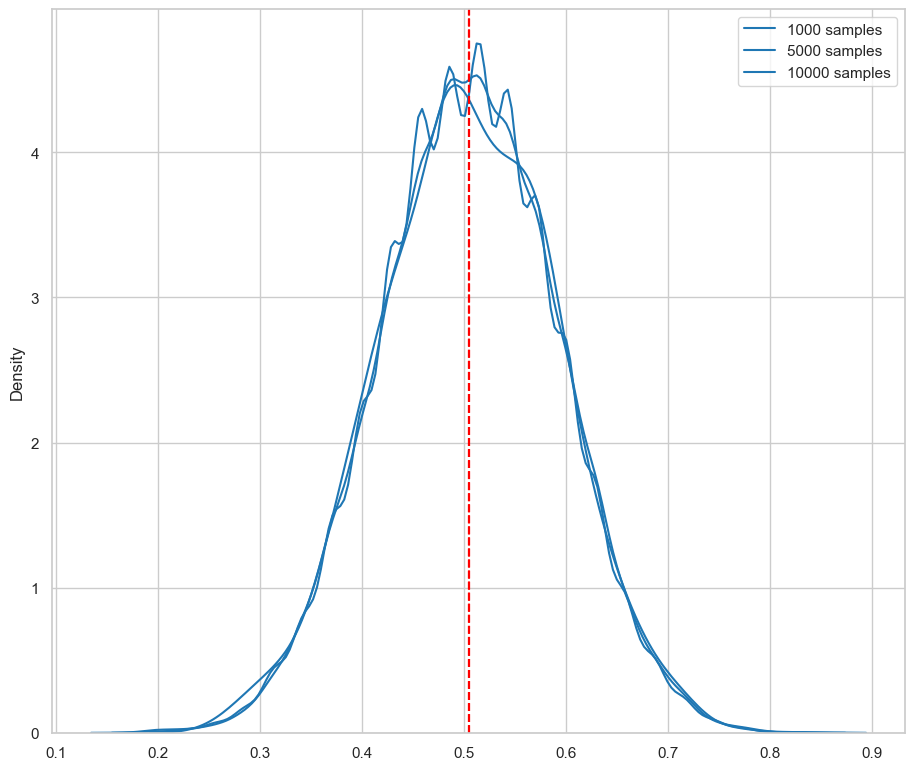

In [71]:
# Experimenta con diferentes n√∫meros de muestras
# sample_size = 35
samples_list = []           # Creamos una lista vac√≠a
np.random.seed(42) # Definimos una semilla para que los resultados sean reproducibles
for number_samples in [1000, 5000, 10000]:
    samples_df = pd.DataFrame()
    for i in range(number_samples):
        sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
        sample_name = f"sample_{i}"
        temp_df = pd.DataFrame({sample_name: sex_numeric_sample})
        samples_list.append(temp_df)

    # Concatenar todas las muestras de una vez, lo que evitar√° la fragmentaci√≥n
    samples_df = pd.concat(samples_list, axis=1)

    sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
    sns.kdeplot(data=sample_means_binomial, label=f'{number_samples} samples')
    plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

plt.legend()
plt.show()

Otra forma de ver el efecto de ir incrementando las muestras es con el siguiente c√≥digo:
En donde vemos, que a medida que aumenta el numero de muestras los valores se van acercando a la linea roja que es el valor esperado (porcentaje de pinguinos macho)

In [72]:
# Calculamos el promedio con 1 muestra, luego con 2, con 3 y as√≠ hasta llegar a 1000 
number_samples = 1000
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)



(0.30450450450450445, 0.7045045045045044)

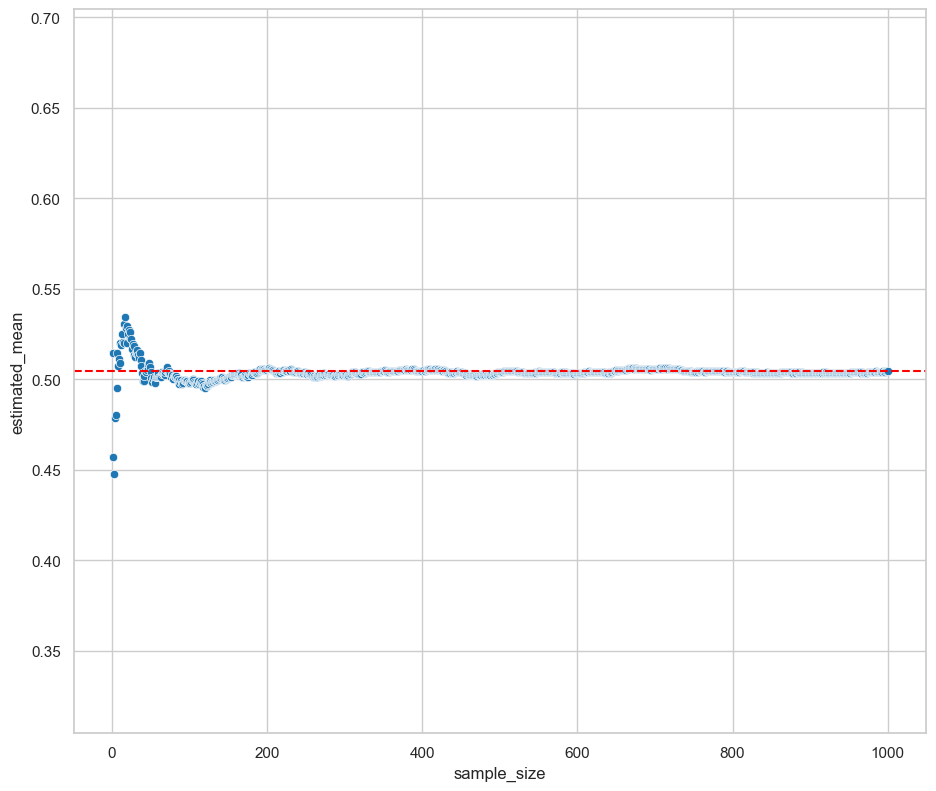

In [73]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

<h1 style="color: blue;">ANALISIS BIVARIADO con Variables Num√©ricas continuas</h1>

## La tecnica m√°s comun son Gr√°ficos de dispersi√≥n (scatter plots).

### Estableciendo relaciones entre dos variables con gr√°fica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

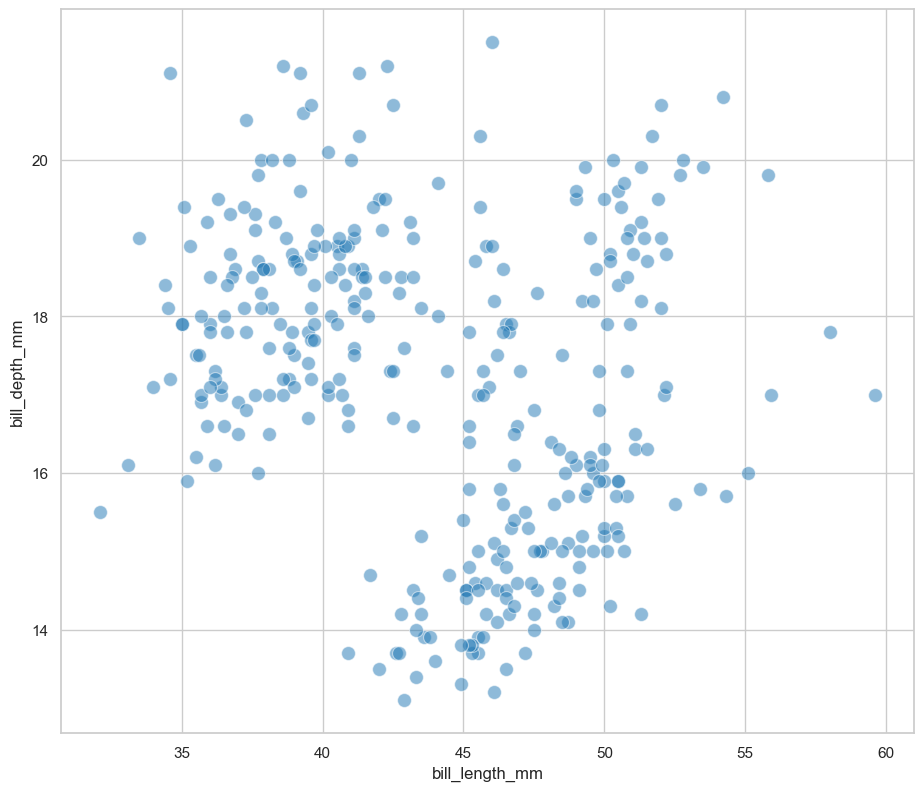

In [74]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2, # me resalta los datos que se solapan (por cada dos me da el color mas oscuro)
    s=100
)

### Otra forma, para observar relaciones entre dos variables con gr√°fica histograma de dos dimensiones 2D

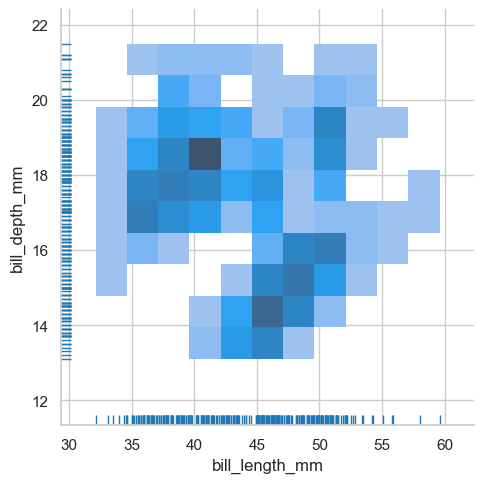

In [75]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True # Esto nos dibuja lineas en los ejes por cada muestra
)

### Otra forma de observar las relaciones entre dos variables con gr√°fica de densidad (PDF)

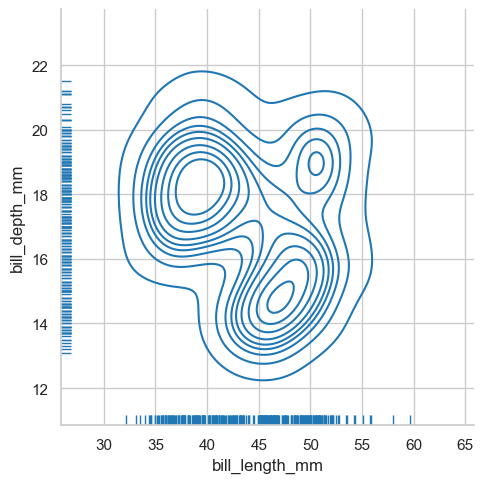

In [76]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    rug=True
)

### Otra forma para observar relaciones entre dos variables es con grafica de dispersion de puntos, cada eje con un histograma.

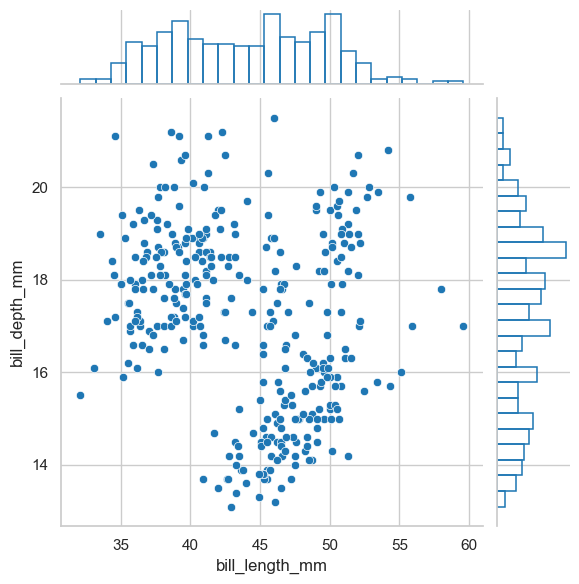

In [77]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    marginal_kws=dict(bins=25, fill=False)
)

<h1 style="color: blue;">ANALISIS BIVARIADO con Variables Num√©ricas una y=continua y una x=discreta</h1>

# Estableciendo relaciones: Gr√°ficos de viol√≠n y boxplots

### Establecemos la relaci√≥n con scatterplot. Lo cual nos genera datos sobre un mismo eje.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

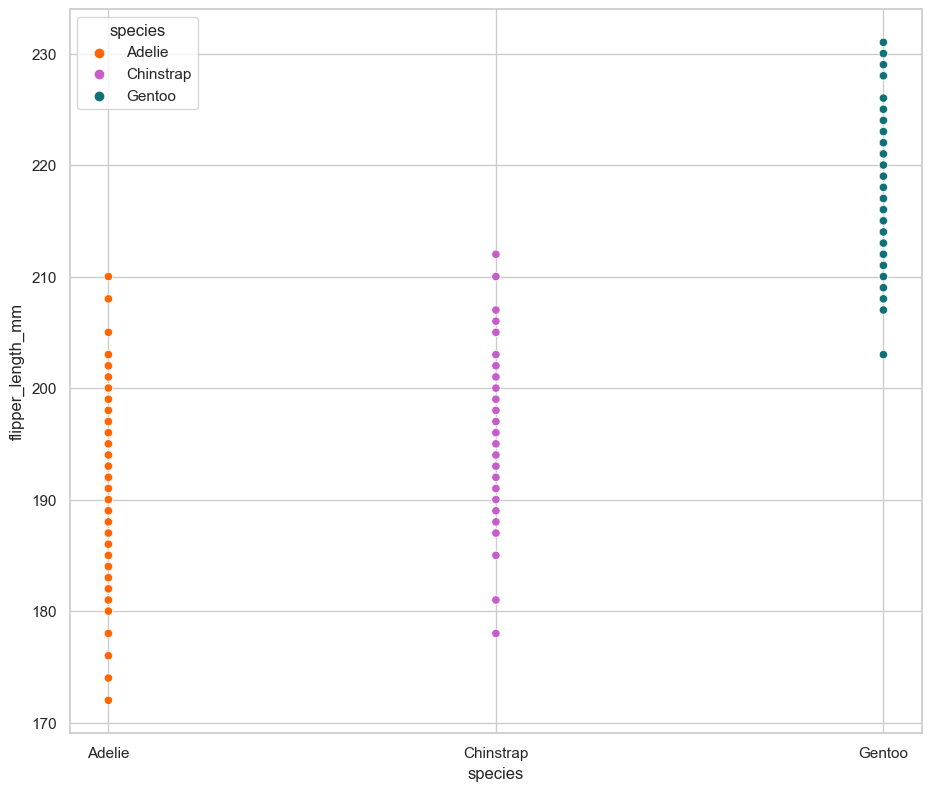

In [78]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### A la anterior grafica, podemos hacerle un ajuste con stripplot, que lo que hace es a√±adir un "ruido" para poder ver mejor la concentraci√≥n de los datos.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

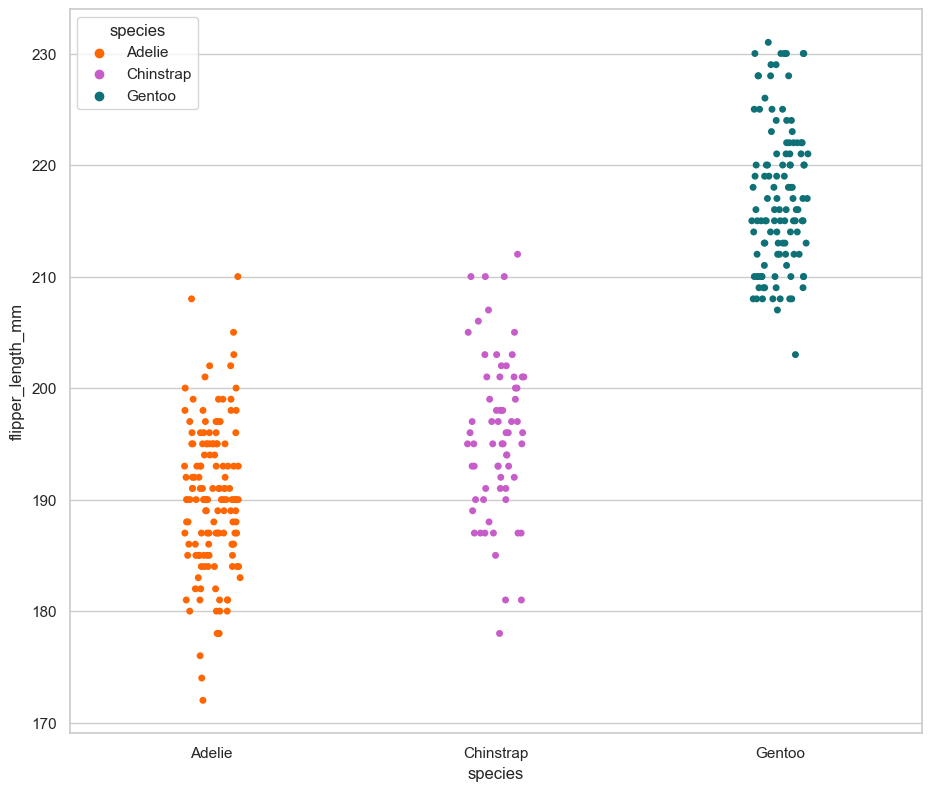

In [79]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### Otra forma de ver los datos es con boxplot enriquecido con stripplot.

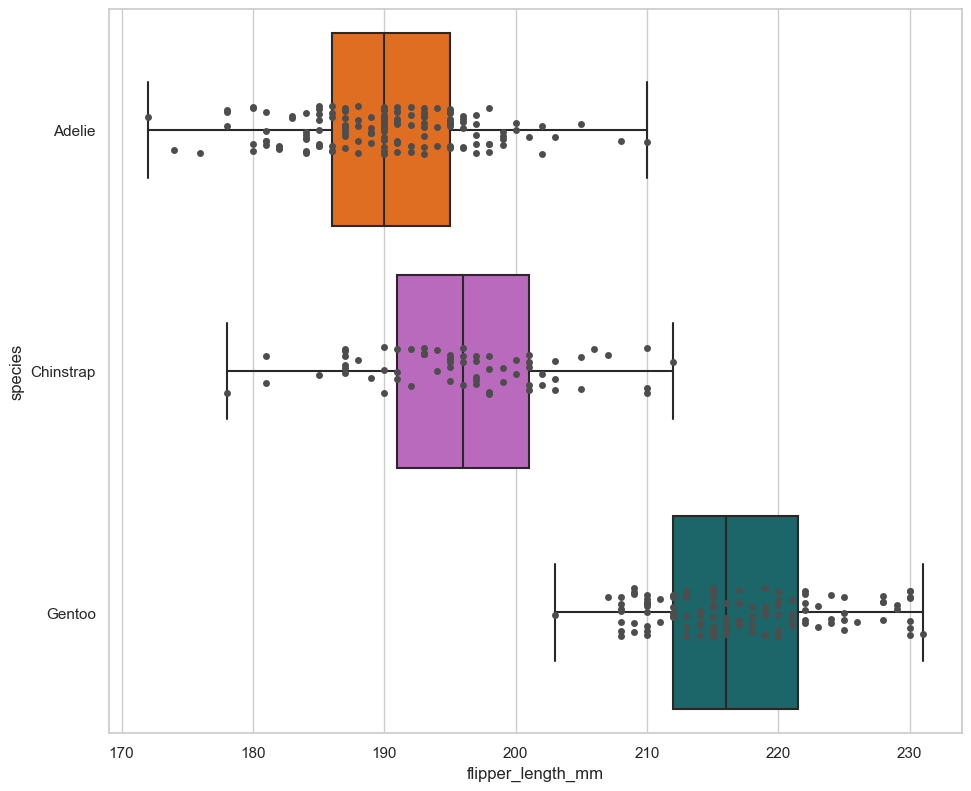

In [80]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

### Otra forma de verlo es con la grafica de violin enriquecido tambien con stripplot.

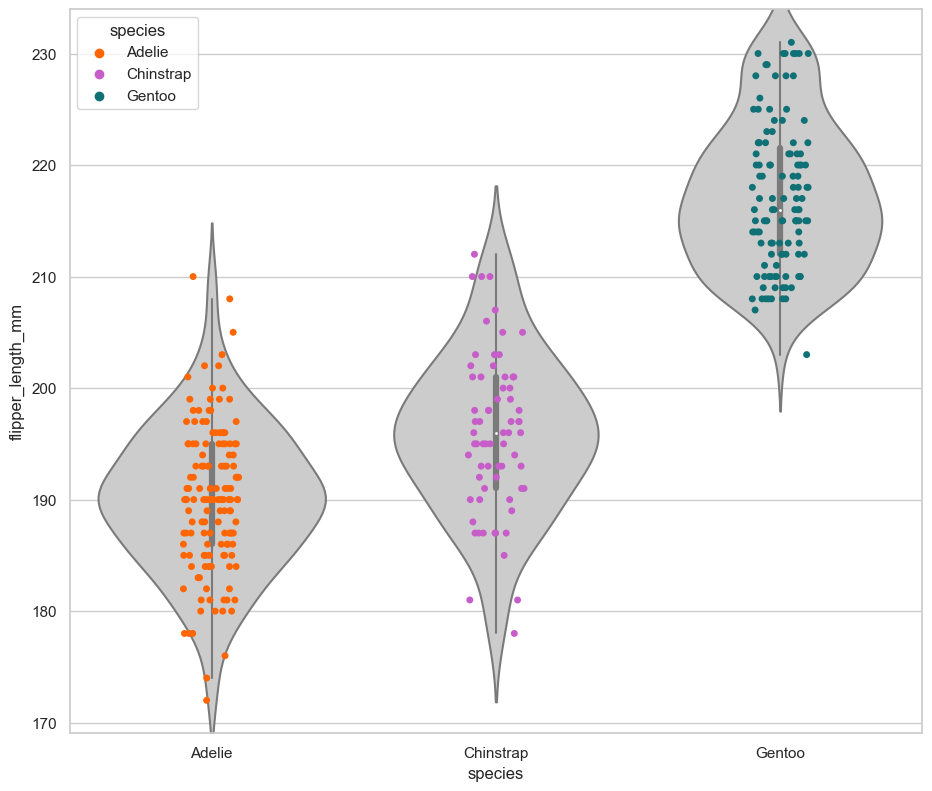

In [81]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Otra forma de verlo es con la grafica de swarmplot, similar al stripplot pero mas ordenado.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

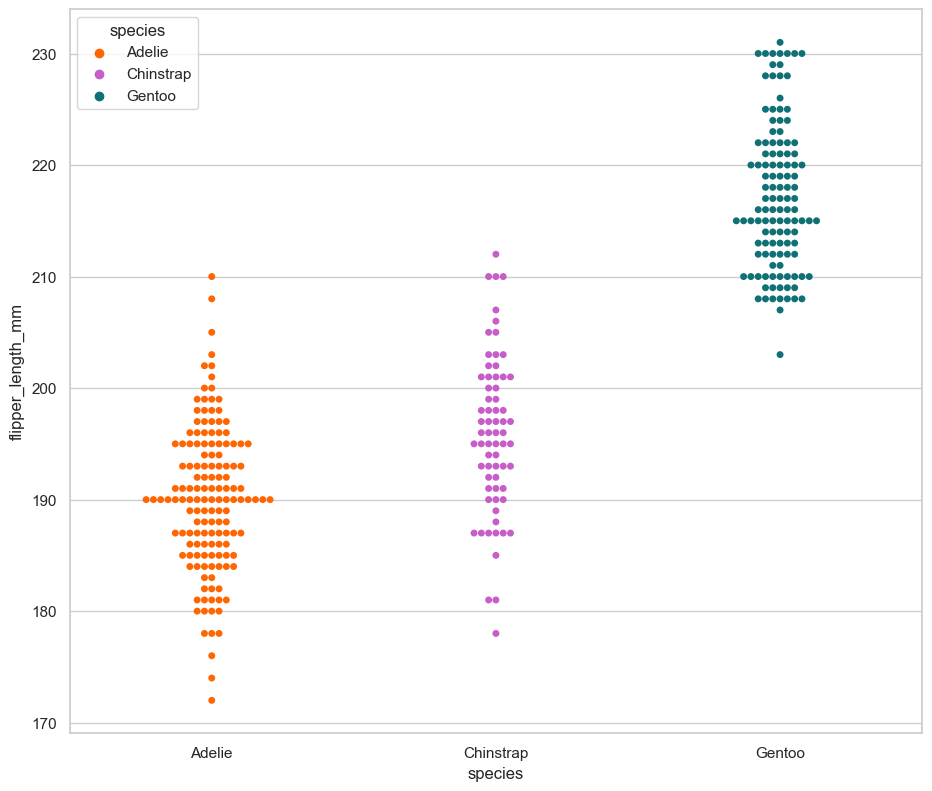

In [82]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Otra forma de observar relaciones entre dos variables numericas de una manera mas amplica es mediante matrices de correlaci√≥n

### De esta manera podemos verificar si Existe una correlaci√≥n lineal entre alguna de nuestras variables. Correlaci√≥n de 1 es perfecta, 0 indica no hay correlaci√≥n, -1 correlaci√≥n divergente.  
### Nota: La correlaci√≥n no indica causalidad es de tu parte validar si tiene sentido o no.

In [83]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

Una variable comparada consigo misma nos da una correlaci√≥n de 1.(diagonal de 1)
Se ve una correlaci√≥n fuerte entre el peso y longitud de la aleta.

### ¬øComo puedo visualizar los coeficientes de correlaci√≥n? La opci√≥n mas usada y bonita es el heatmap 

<AxesSubplot: >

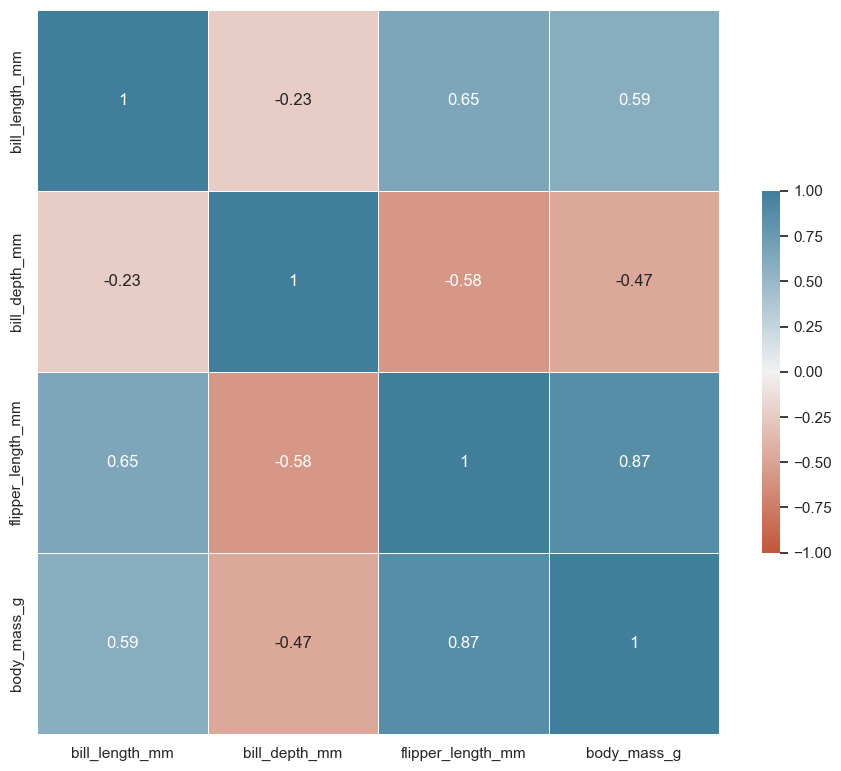

In [84]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

### Otra forma de ver la matriz de correlaci√≥n es con clustermap que lo que hace es organizar por grupos las correlaciones para identificar rapidamente las positivas y negativas, y su fuerza de correlaci√≥n.

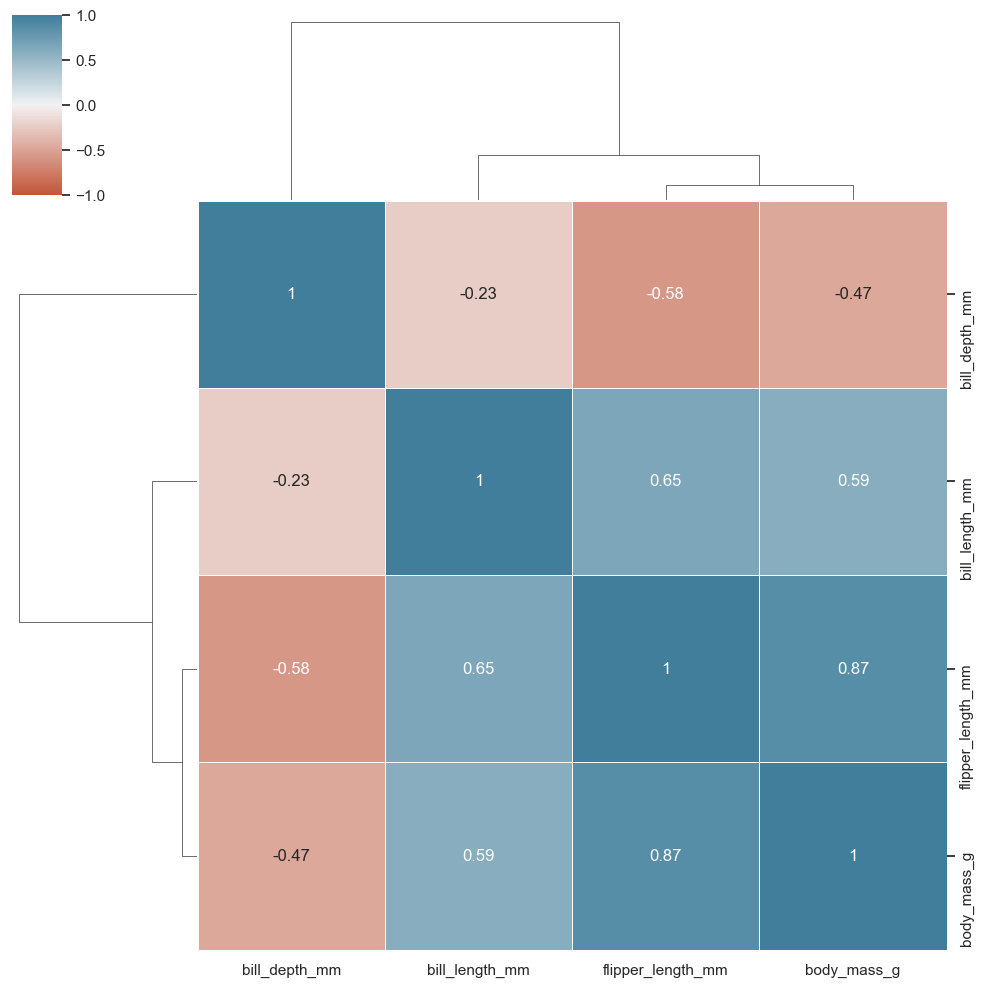

In [85]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

### ¬øC√≥mo podr√≠a representar una variable categ√≥rica como num√©rica discreta? Para elllo debemos convertir las variables categoricas en numericas. Veamos ejemplo con sexo.

In [86]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['Female', 'Male'], [0, 1])

    )
)

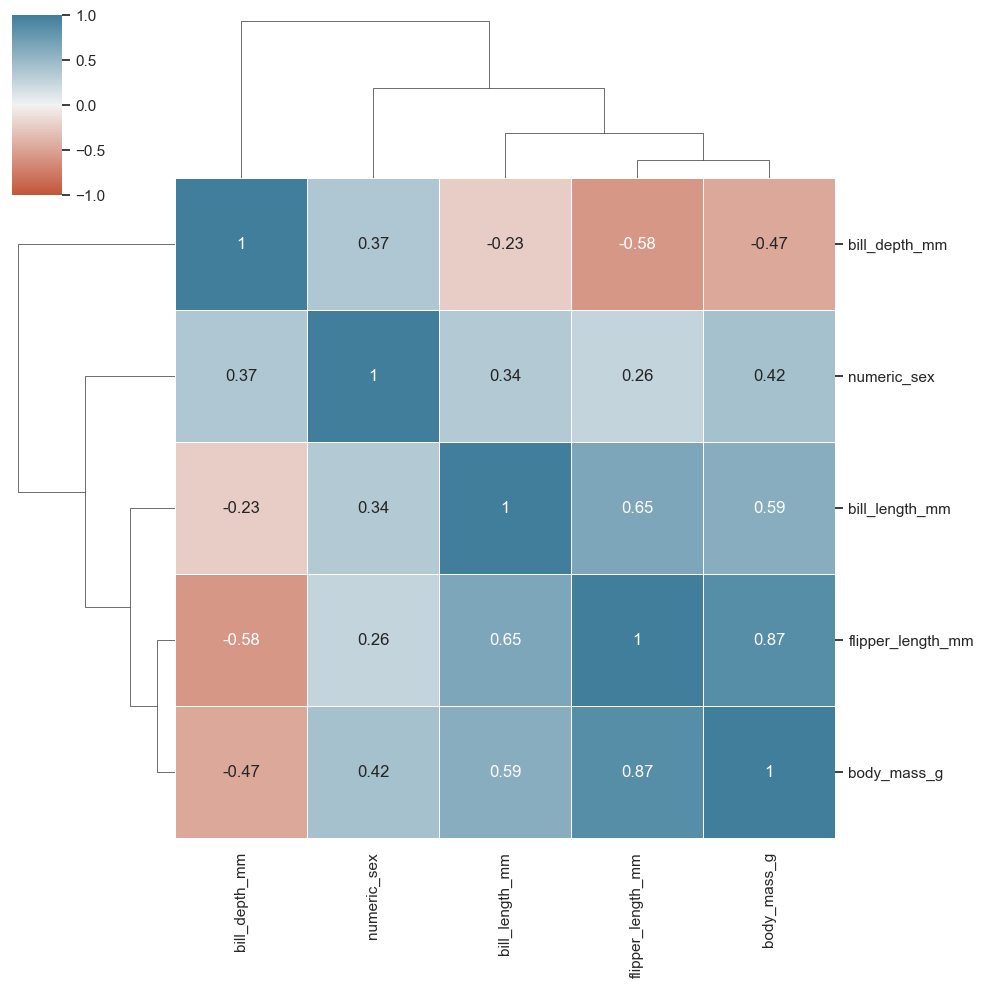

In [87]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## ¬øCu√°l es una l√≠mitante de los coeficientes de correlaci√≥n lineal?

### S√≥lo nos ayuda a determinar la posible existencia de una correlaci√≥n lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlaci√≥n, por ejemplo cuadr√°tica.

array([[1.        , 0.02142433],
       [0.02142433, 1.        ]])

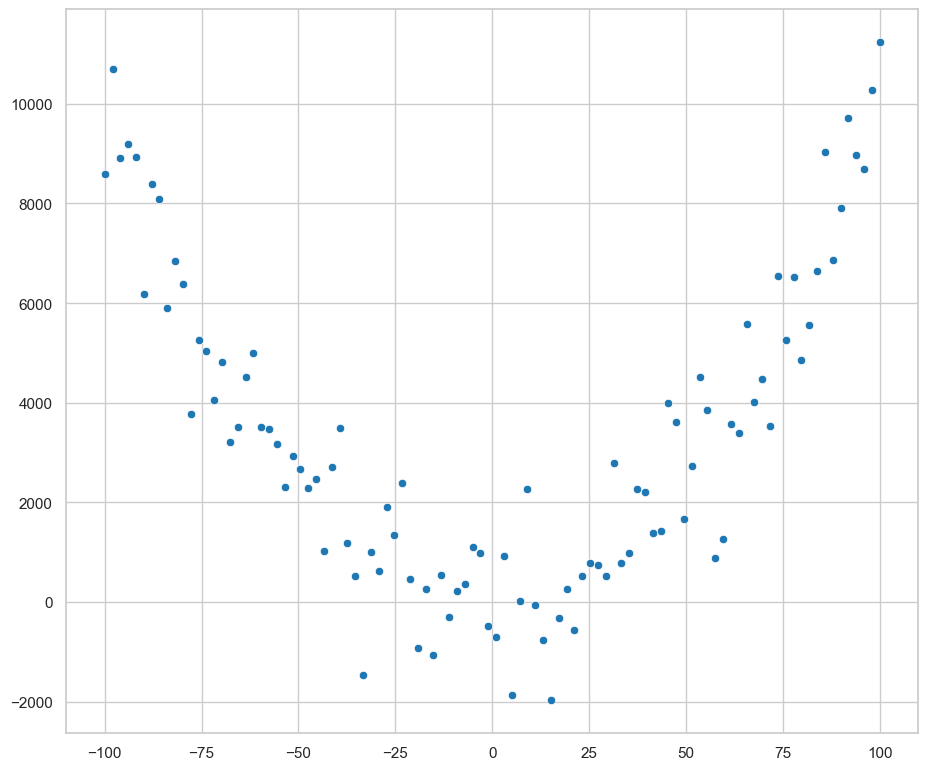

In [88]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

array([[1.        , 0.91669286],
       [0.91669286, 1.        ]])

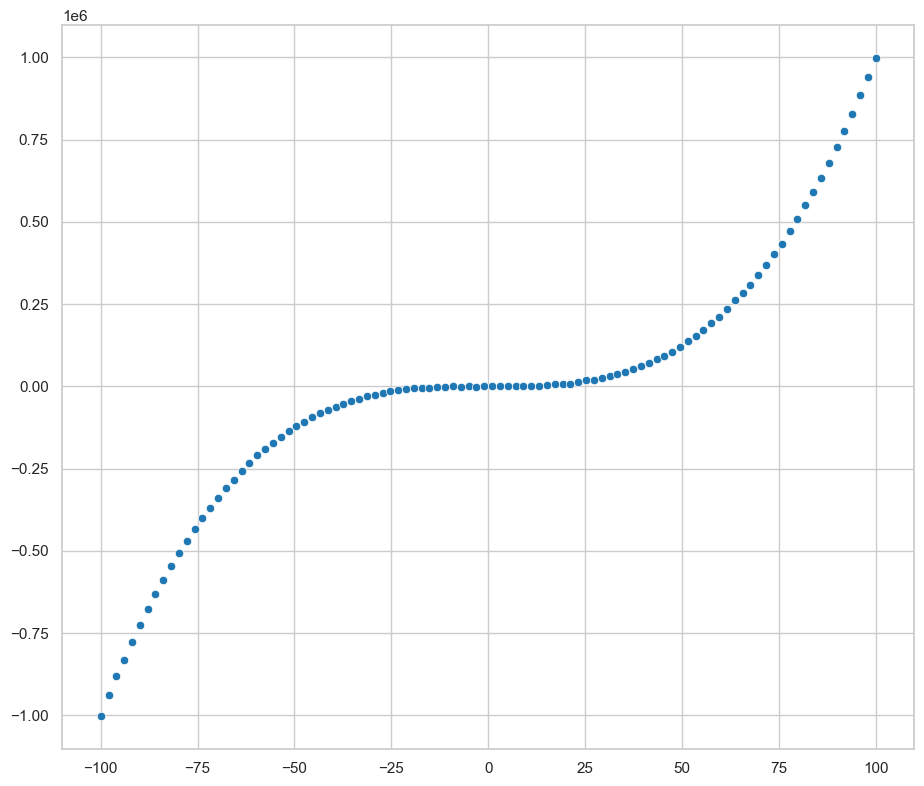

In [89]:
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

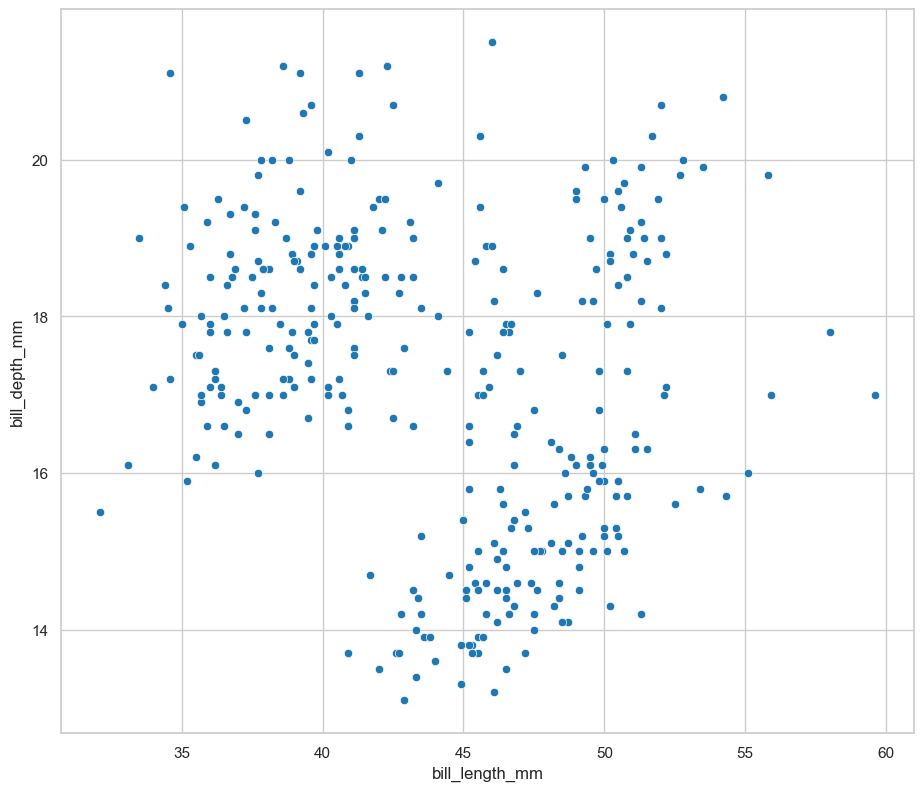

In [90]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

## ¬øExiste algun tipo de correlaci√≥n entre estas dos variables?

Con una correlaci√≥n de -0.228626, la relaci√≥n entre las dos variables (`bill_length_mm` y `bill_depth_mm`) es **d√©bil y negativa**.

### ¬øQu√© significa una correlaci√≥n de -0.23?

- **Correlaci√≥n negativa**: El signo negativo indica que a medida que una de las variables aumenta, la otra tiende a disminuir, aunque la relaci√≥n no es fuerte.
- **Correlaci√≥n d√©bil**: Un valor de -0.23 est√° bastante cerca de 0, lo que sugiere que la relaci√≥n entre las dos variables es d√©bil. Es decir, aunque hay una tendencia en la que una variable aumenta cuando la otra disminuye, esta tendencia no es muy pronunciada.

### Interpretaci√≥n en contexto:
- Si `bill_length_mm` (longitud del pico) aumenta, `bill_depth_mm` (profundidad del pico) tiende a disminuir ligeramente, pero la relaci√≥n no es lo suficientemente fuerte como para hacer predicciones fiables basadas en una de las variables respecto a la otra.
- Esta relaci√≥n d√©bil podr√≠a ser influenciada por otros factores que no est√°n siendo considerados aqu√≠, o podr√≠a ser simplemente que las dos variables no est√°n fuertemente relacionadas.

## El coeficiente de correlaci√≥n no nos habla del impacto de la relaci√≥n

El **coeficiente de correlaci√≥n de Pearson** mide la **fuerza y la direcci√≥n** de una relaci√≥n lineal entre dos variables, pero **no nos indica el impacto** o la **causalidad** de esa relaci√≥n. Aqu√≠ est√°n las razones por las que no nos habla del impacto:

### 1. **Solo mide la relaci√≥n lineal:**
   - El coeficiente de correlaci√≥n **solo captura relaciones lineales**. Esto significa que si dos variables tienen una relaci√≥n no lineal, el coeficiente de correlaci√≥n no ser√° capaz de detectarlo, aunque esa relaci√≥n no lineal podr√≠a ser muy fuerte o significativa.
   
### 2. **No implica causalidad:**
   - Un coeficiente de correlaci√≥n alto (ya sea positivo o negativo) **no significa que una variable cause el cambio en la otra**. Puede haber una **correlaci√≥n espuria** donde dos variables est√©n correlacionadas debido a una tercera variable o por azar.
   - Ejemplo: El aumento en el consumo de helados y el aumento de accidentes de tr√°fico en verano pueden estar correlacionados, pero esto no significa que comer helado cause accidentes de tr√°fico. En realidad, ambos son impulsados por la misma causa: el calor del verano.

### 3. **No refleja el tama√±o del impacto:**
   - La correlaci√≥n solo indica si las variables se mueven juntas (positivamente o negativamente), pero **no nos dice cu√°nto cambia una variable cuando cambia la otra**. 
   - Para entender el impacto de una variable sobre otra, generalmente se necesitar√≠a un modelo **de regresi√≥n** que no solo cuente la relaci√≥n, sino que tambi√©n cuantifique el impacto de una variable en funci√≥n de otra (por ejemplo, cu√°ntos puntos aumenta `bill_depth_mm` por cada mil√≠metro adicional en `bill_length_mm`).

### 4. **El valor de la correlaci√≥n no refleja la magnitud del cambio:**
   - Una correlaci√≥n de, por ejemplo, 0.8 entre dos variables indica que hay una relaci√≥n fuerte y positiva, pero **no nos dice c√≥mo o cu√°nto cambiar√°n las variables si se cambia una**. 

### En resumen:
El coeficiente de correlaci√≥n nos da informaci√≥n sobre **si** dos variables est√°n relacionadas y si lo est√°n de forma **positiva o negativa**, pero no nos dice **cu√°nto influye una sobre otra** ni **por qu√©** se produce esa relaci√≥n. Para comprender el impacto de la relaci√≥n, ser√≠a necesario un an√°lisis m√°s profundo, como un **modelo de regresi√≥n** o un an√°lisis de causalidad.

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


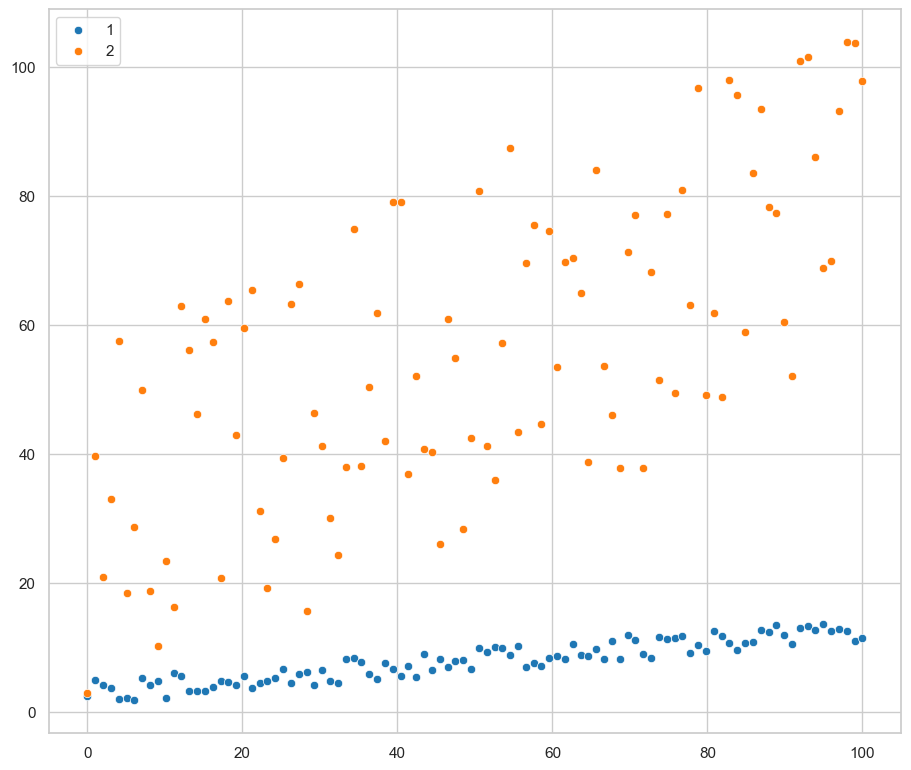

In [91]:
# En este ejemplo vemos como no es conveniente fiarnos solo del valor de la correlaci√≥n 
# sin ver la grafica de dispersi√≥n de puntos ya que nos perder√≠amos el impacto.
# En la grafica vemos:
# puntos azules muestran alta correlaci√≥n con impacto bajo
# puntos naranjas muestran media correlaci√≥n pero con impacto mas alto

np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

## REGRESION LINEAL SIMPLE
### ¬øComo calcular el impacto de mi correlaci√≥n?


El siguiente c√≥digo realiza un an√°lisis de regresi√≥n lineal para dos conjuntos de datos diferentes utilizando la funci√≥n `linregress` de la biblioteca `scipy.stats` y luego imprime los resultados.

### Descripci√≥n paso a paso:

**`scipy.stats.linregress(x=x_1, y=y_1)`**:
   - Se realiza una regresi√≥n lineal entre dos variables: `x_1` (variable independiente) y `y_1` (variable dependiente).
   - La funci√≥n `linregress` calcula los coeficientes de la regresi√≥n lineal, que incluyen:
     - La pendiente de la recta de regresi√≥n (slope)
     - La intersecci√≥n o el valor de la recta cuando `x` es 0 (intercepto). (intercept)
     - El valor de **r** (coeficiente de correlaci√≥n de Pearson), que mide la fuerza de la relaci√≥n lineal.
     - El valor **p** (p-value), que indica la significancia estad√≠stica de la regresi√≥n.
     - El **stderr** (error est√°ndar), que mide la precisi√≥n de la estimaci√≥n de los par√°metros.

   El resultado de esta regresi√≥n se guarda en `res_1` y otro resultado para `res_2`

In [92]:
# De las variables definidas anteriormente
res_1 = scipy.stats.linregress(x=x_1, y=y_1) # puntos azules x_1 y y_1
res_2 = scipy.stats.linregress(x=x_2, y=y_2) # puntos naranjas x_2 y y_2

# Aqui el parametro que mas nos sirve es el slope o pendiente de la linea recta.

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


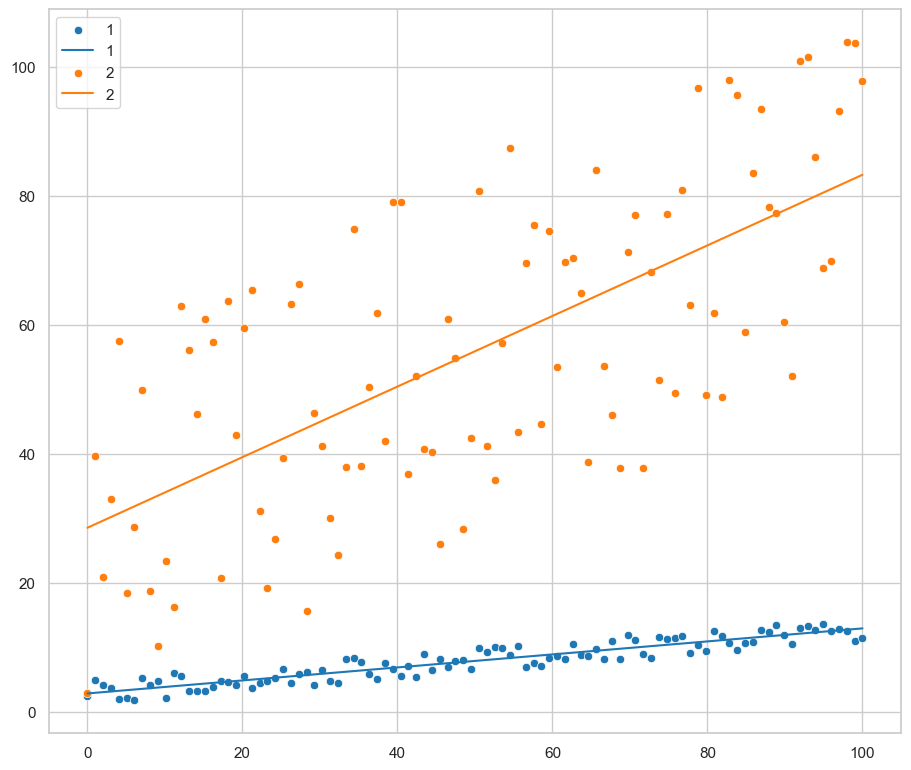

In [93]:
# En la siguiente grafica podemos ver un poco mejor el slope o pendiente de las rectas.
# Con la cual confirmamos que los puntos naranjas tienen un mayor impacto.

sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


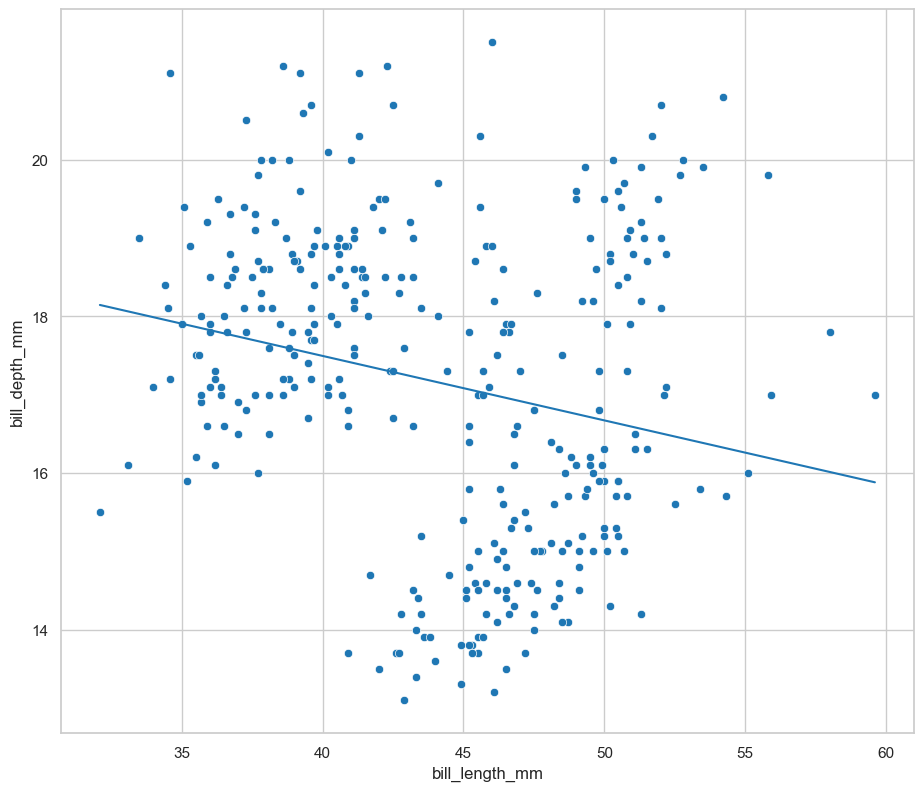

In [94]:
# Si hacemos el ejercicio con las variables del ejercicio de los datos de pinguinos.
# Y podemos confirmar que entre bill_depth_mm y bill_lenght_mm 
# La correlaci√≥n es negativa y el slope tambien es negativo

sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1 # Ecuacion de la linea recta

plt.plot(fx_1, fy_1)

### Otra forma de verlo es con seaborn usando lmplot
Nota: es importante saber sacar la grafica de ambas formas, ya que aqui nos perdemos los datos que resultan de:  
scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)

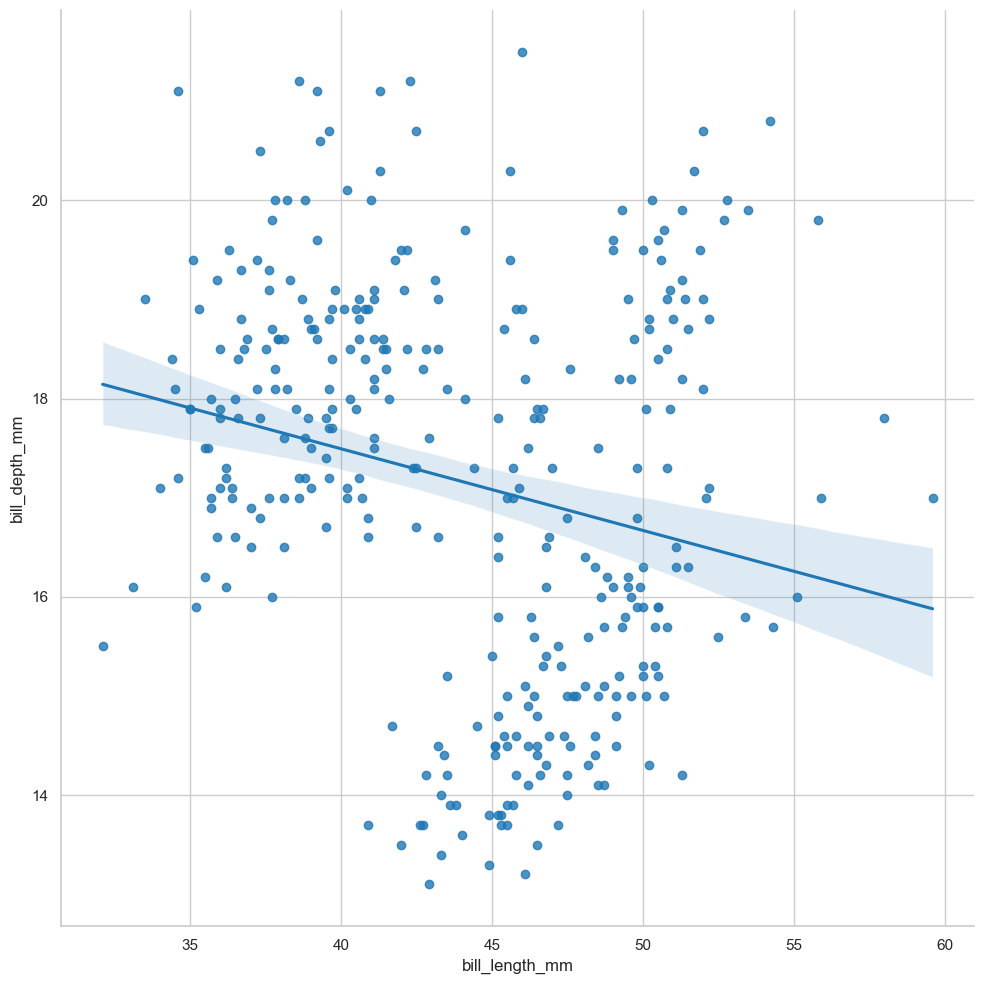

In [95]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

# Limitaciones del an√°lisis de regresi√≥n simple

## La regresi√≥n lineal simple no es sim√©trica
Es decir que la regresi√≥n lineal simple de X vs Y no es lo mismo que X vs Y.
Establecer cual variable debe ir en el eje de las X depender√° de lo que quieres analizar.
En algunos casos ser√° complejo como nuestro ejemplo, si primero va longitud de pico √≥ altura de pico. 
Pero en muchos otros casos ser√° m√°s facil como por ejemplo variables de tiempo vamos a querer que est√©n en el eje de la X.

In [96]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

# Hacemos el comparativo 
res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(y=x, x=y)

# Donde vemos que el slope cambia :O
print(res_x_y, res_y_x, sep="\n")

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)
LinregressResult(slope=-0.6349051704195029, intercept=54.89085424504756, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.14859778216623312, intercept_stderr=2.567341513538256)


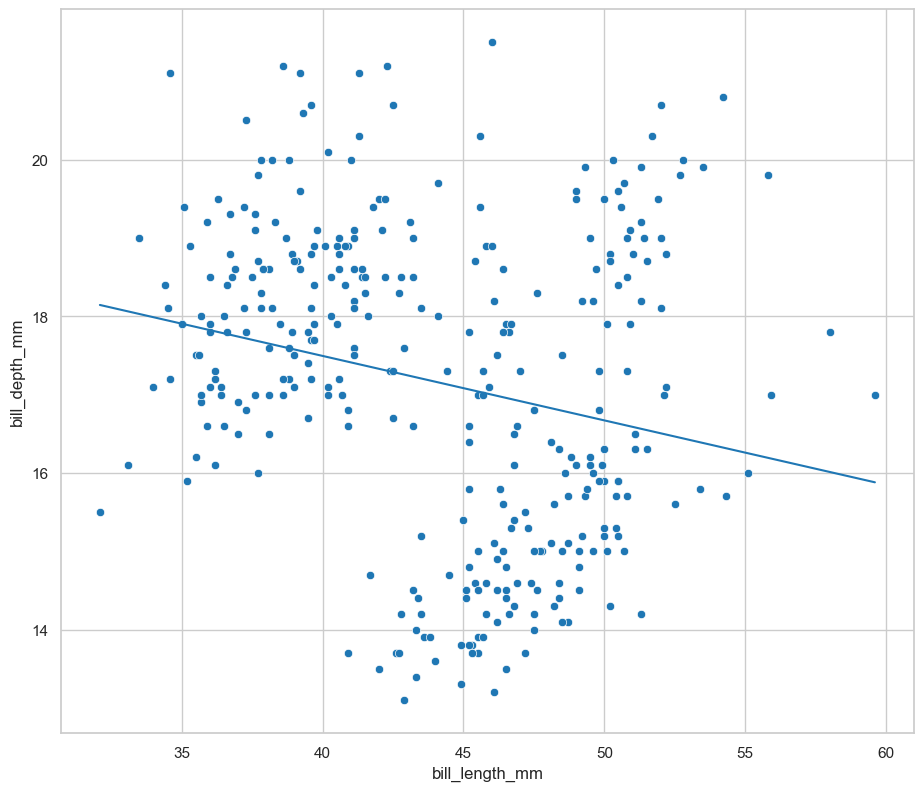

In [97]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

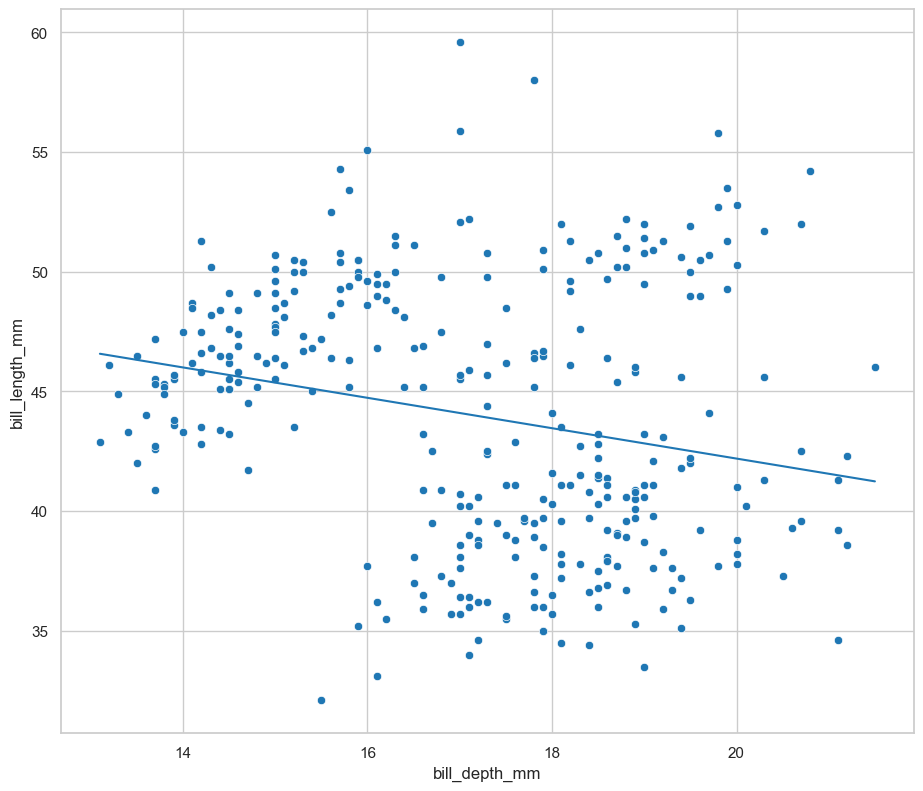

In [98]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

plt.plot(fx_2, fy_2)

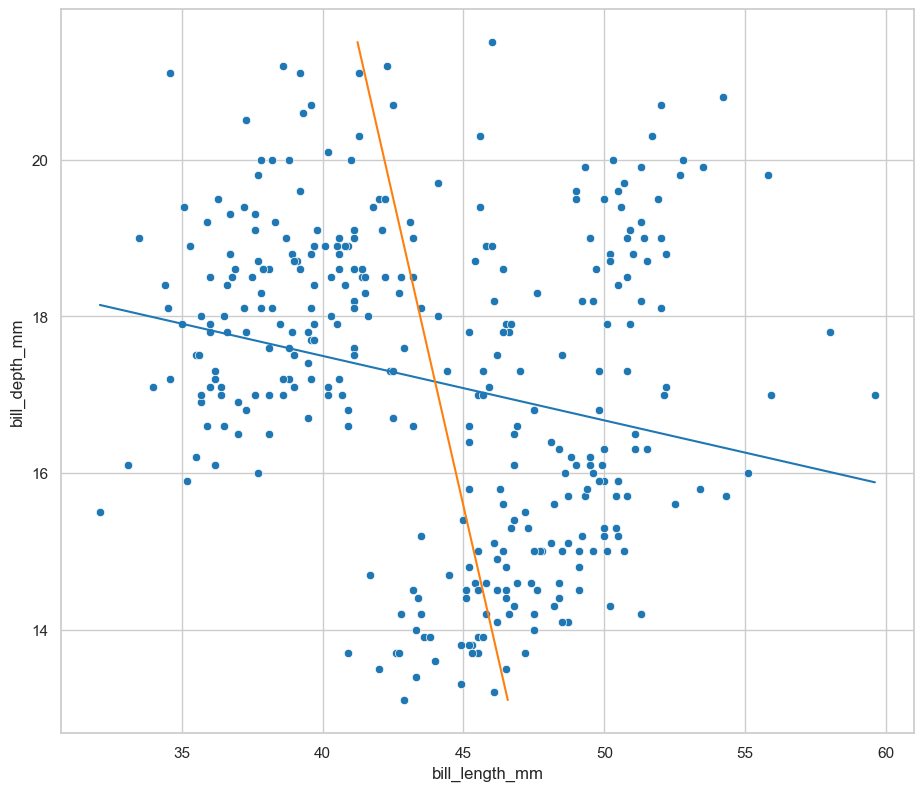

In [99]:
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1,fy_1)
plt.plot(fy_2,fx_2)

## La regresi√≥n no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables

### ¬øPara qu√© sirve `smf.ols`?

`smf.ols` (de la biblioteca `statsmodels.formula.api`) es una funci√≥n que se utiliza para realizar regresi√≥n lineal en modelos estad√≠sticos m√°s complejos, espec√≠ficamente para ajustar modelos lineales donde las relaciones entre las variables se pueden especificar mediante f√≥rmulas.

La funci√≥n `smf.ols` es parte del m√≥dulo `statsmodels`, que es una biblioteca muy usada en an√°lisis estad√≠stico en Python. La sigla "ols" significa **"Ordinary Least Squares"**, que es el m√©todo de m√≠nimos cuadrados ordinarios, el cual se usa para encontrar la mejor l√≠nea recta que ajusta los datos de acuerdo con el criterio de minimizar la suma de los cuadrados de las diferencias entre los valores predichos y los valores observados.


In [100]:
(
    smf.ols(
        formula="bill_length_mm ~ bill_depth_mm",
         data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

La pendiente es -0.634905, lo que significa que cada mil√≠metro adicional de profundidad del pico es asociado a un decremento de -0.634905 mil√≠metros de la longitud del pico de un ping√ºino.

In [101]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

La pendiente es -0.082327, lo que significa que cada mil√≠metro adicional de longitud del pico es asociado a un decremento de -0.082327 mil√≠metros de la profundidad del pico de un ping√ºino.

In [102]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
    .summary() # Muestra un resumen completo de los resultados del modelo ajustado.
)

"""     El resumen generado por .summary() incluir√°:

        Coeficiente de la regresi√≥n: Indica cu√°nto cambia la variable dependiente 
        (profundidad del pico) por cada unidad de cambio en la variable independiente 
        (longitud del pico).
        
        Valor p: Para determinar si el coeficiente es estad√≠sticamente significativo.
        
        R cuadrado: Mide el porcentaje de la variabilidad de bill_depth_mm que es explicado 
        por bill_length_mm.
        
        Intervalos de confianza: Para evaluar la precisi√≥n de las estimaciones de los coeficientes.
"""

'     El resumen generado por .summary() incluir√°:\n\n        Coeficiente de la regresi√≥n: Indica cu√°nto cambia la variable dependiente \n        (profundidad del pico) por cada unidad de cambio en la variable independiente \n        (longitud del pico).\n        \n        Valor p: Para determinar si el coeficiente es estad√≠sticamente significativo.\n        \n        R cuadrado: Mide el porcentaje de la variabilidad de bill_depth_mm que es explicado \n        por bill_length_mm.\n        \n        Intervalos de confianza: Para evaluar la precisi√≥n de las estimaciones de los coeficientes.\n'

1. **Dep. Variable: bill_depth_mm**  
   **Variable dependiente:** La variable que est√°s tratando de predecir o explicar, en este caso, es `bill_depth_mm` (profundidad del pico).

2. **R-squared: 0.052**  
   **R-cuadrado:** Este valor indica que solo el 5.2% de la variabilidad de `bill_depth_mm` puede ser explicada por la variable independiente `bill_length_mm` (longitud del pico). Es un valor bastante bajo, lo que sugiere que la longitud del pico no es un buen predictor para la profundidad del pico.

3. **Adj. R-squared: 0.049**  
   **R-cuadrado ajustado:** Esta es una versi√≥n corregida de R-cuadrado que tiene en cuenta el n√∫mero de predictores en el modelo. El valor ajustado tambi√©n es bajo, lo que reafirma que la longitud del pico no explica bien la profundidad del pico.

4. **F-statistic: 18.26**  
   **Estad√≠stico F:** El valor de 18.26 eval√∫a si al menos una de las variables independientes en el modelo tiene una relaci√≥n significativa con la variable dependiente. En este caso, el valor es razonablemente alto, lo que sugiere que la relaci√≥n entre `bill_length_mm` y `bill_depth_mm` es estad√≠sticamente significativa.

5. **Prob (F-statistic): 2.53e-05**  
   **Valor p del estad√≠stico F:** Este valor indica la probabilidad de que el modelo sea significativo de manera aleatoria. Dado que el valor es muy peque√±o (mucho menor que 0.05), podemos rechazar la hip√≥tesis nula y concluir que la relaci√≥n es significativa.

6. **Log-Likelihood: -688.72**  
   **Logaritmo de la verosimilitud:** Una medida del ajuste del modelo. Los valores m√°s altos indican un mejor ajuste.

7. **No. Observations: 333**  
   **N√∫mero de observaciones:** Hay 333 observaciones (filas de datos) en el conjunto de datos.

8. **AIC: 1381**  
   **AIC (Criterio de Informaci√≥n de Akaike):** Este valor se utiliza para comparar modelos. Un valor m√°s bajo indica un mejor modelo en t√©rminos de ajuste y complejidad.

9. **BIC: 1389**  
   **BIC (Criterio de Informaci√≥n Bayesiano):** Similar al AIC, pero penaliza m√°s fuertemente los modelos complejos.

10. **Df Residuals: 331**  
   **Grados de libertad residuales:** Es el n√∫mero de observaciones menos el n√∫mero de par√°metros estimados en el modelo. En este caso, 331 grados de libertad.

11. **Df Model: 1**  
   **Grados de libertad del modelo:** El modelo tiene un solo predictor (la longitud del pico), por lo que tiene 1 grado de libertad.

12. **Covariance Type: nonrobust**  
   **Tipo de covarianza:** Este valor indica que se est√° utilizando una estimaci√≥n est√°ndar de los errores del modelo (sin robustecer).

<h1 style="color: blue;">ANALISIS MULTIVARIADO</h1>

En este caso, podriamos estar considerando que la interacci√≥n de mas de dos variables esta afectando el comportamiento de nuestra variable objetivo. 

# An√°lisis de regresi√≥n lineal m√∫ltiple

## Olvid√© mi b√°scula para pesar a los ping√ºinos, ¬øCu√°l ser√≠a la mejor forma de capturar ese dato?

### Creando modelos
Pon especial atenci√≥n a las pendientes y el R cuadrado (cercano a 1 ser√° mas preciso)

In [103]:
# Este ya lo habiamos usado en regresi√≥n simple

model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.54e-32
Time:                        14:26:14   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Tambien funciona para regresi√≥n m√∫ltiple de dos variables
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm ",
         data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           7.04e-46
Time:                        14:26:14   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Tambien funciona para regresi√≥n m√∫ltiple de 3 variables
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          9.26e-103
Time:                        14:26:14   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
# Tambien funciona para regresi√≥n m√∫ltiple de 4 variables
# Con C() podemos incluir una variable categorica
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          6.28e-122
Time:                        14:26:14   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          3.53e-118
Time:                        14:26:14   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.Male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

Si vemos la distribuci√≥n o histrograma de la variable peso real versus cada uno de los modelos, podemos confirmar que el modelo 5 es el que m√°s se ajusta.

In [108]:
models_results = pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
338        4925.0         4485.416214         4951.159375         4817.401804   
340        4850.0         4450.699510         4833.930015         4877.548625   
341        5750.0         4763.149845         4899.545411         5269.708799   
342        5200.0         4311.832695         4641.476223         4728.911846   
343        5400.0         4719.753965         4803.936225         4818.337739   

     prediction_model_4  prediction_model_5 species     sex  
0           3579.136946         3441.323750  Adelie    Male  
1           3343.220772         3328.384372  Adelie  Female  
2           3639.137335         3751.223949  Adelie  Female  
4           3457.954243         3657.259599  Adelie  Female  
5           3764.536023         3864.163327  Adelie    Male  
..                  ...                 ...     ...     ...  
338         4730.939522         4643.885279  Gentoo  Female  
340         4719.043886         4690.867454  Gentoo  Female  
341         5402.946434         5367.592935  Gentoo    Male  
342         4563.248182         4549.920929  Gentoo  Female  
343         5020.243038         4944.753358  Gentoo    Male  

[333 rows x 8 columns]

Otra forma de ver que se ajusta la predici√≥n del modelo 5 es usando la CDF, as√≠:

<AxesSubplot: xlabel='actual_value', ylabel='Proportion'>

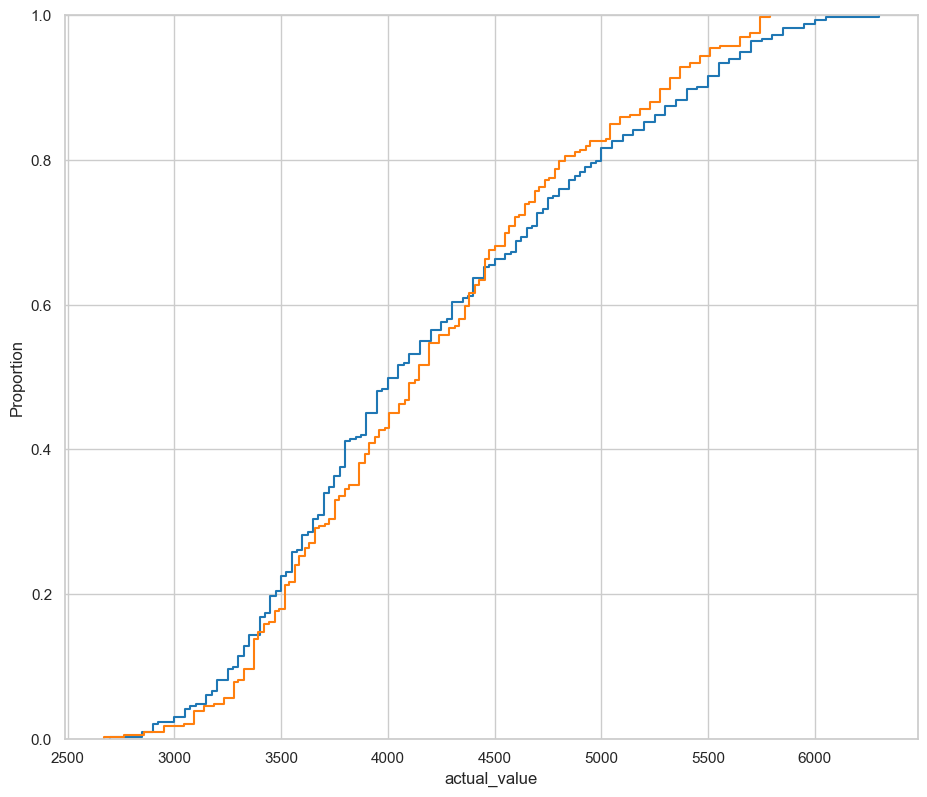

In [125]:
#sns.ecdfplot(data=models_results)
sns.ecdfplot(data=models_results['actual_value'])
sns.ecdfplot(data=models_results['prediction_model_5'])

Otra forma de ver que se ajusta la predici√≥n del modelo 5 es usando la PDF, as√≠:

<AxesSubplot: ylabel='Density'>

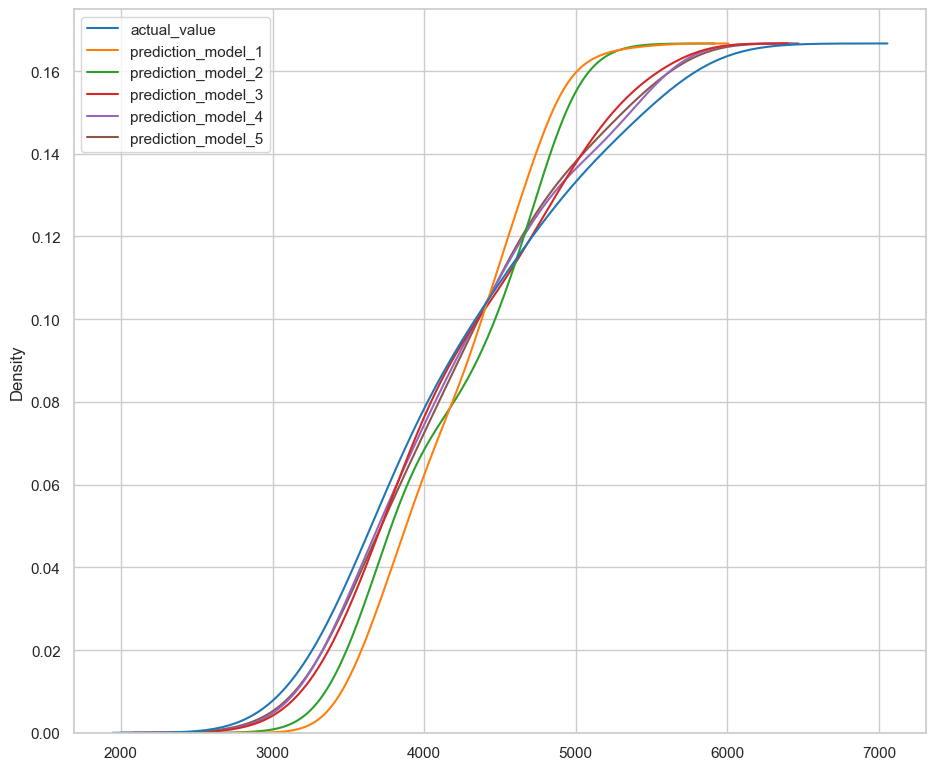

In [127]:
sns.kdeplot(
    data=models_results,
    cumulative=True
)

## ¬øQue pudimos haber encontrado antes de hacer los modelos?

Como regla general, lo primero es revisar las relaciones entre las variables.
Supongamos que ya hicimos visualizaciones de diferentes relaciones y de repente llegamos a la relaci√≥n que nos dice el modelo 5. body_mass_g, flipper_length_mm, sex  
Podemos ver que tambien se ajusta bastante.

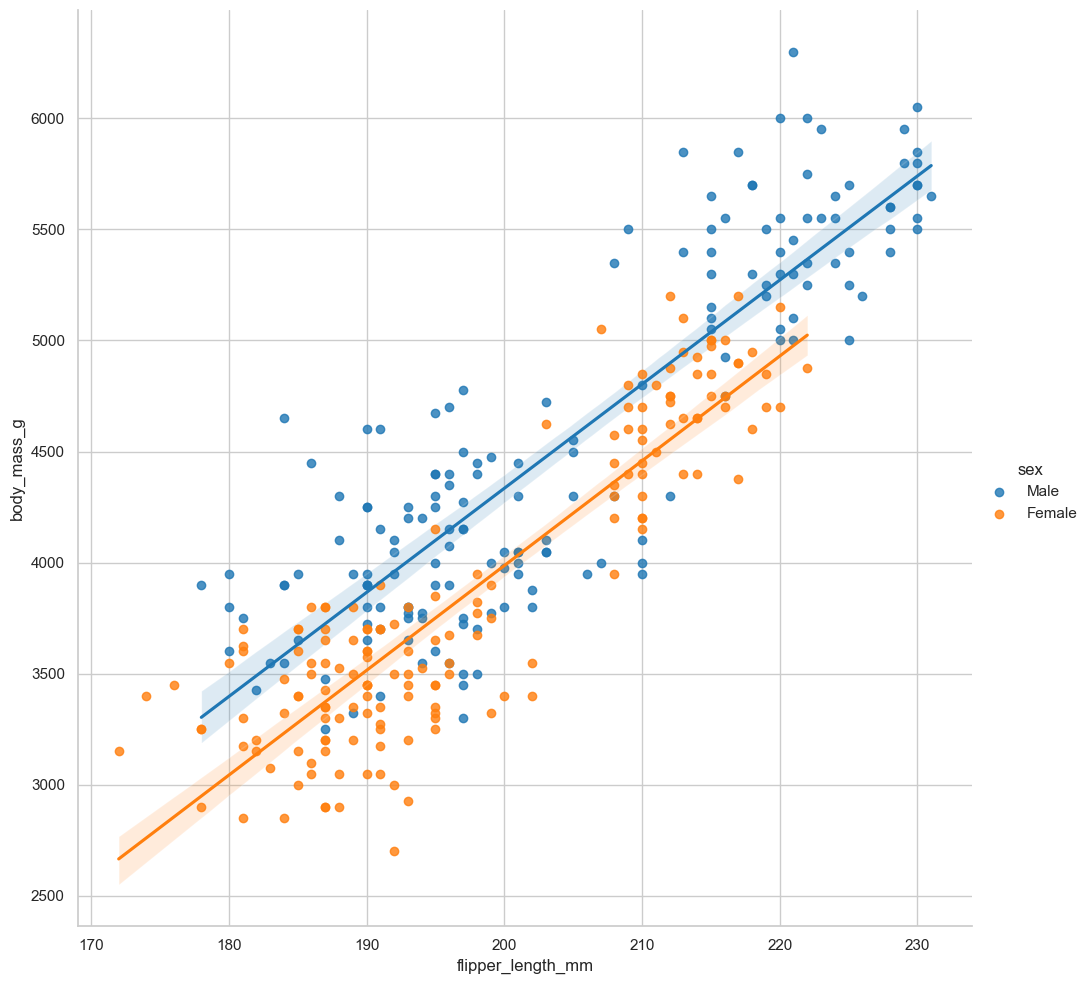

In [111]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)

# An√°lisis de regresi√≥n log√≠stica

El an√°lisis de regresi√≥n log√≠stica es una t√©cnica estad√≠stica utilizada para modelar y analizar la relaci√≥n entre una variable dependiente categ√≥rica (binaria o multinomial) y una o m√°s variables independientes (que pueden ser continuas, categ√≥ricas o mixtas). 

En el ejemplo anterior necesitabamos predecir cuales eran los valores de los pesos de los pinguinos, es decir una variable numerica continua. (como si hubieramos olivdado la bascula para hacer las mediciones).  

Ahora, algo mas sorprendente, necesitamos predecir una variable categorica. (como si hubieramos olvidado las pruebas de sangre para determinar si son machos o hembras). En este caso una variable categorica binaria o binomial que es el caso m√°s sencillo, aunque pudiera extenderse a m√°s de dos opciones √≥ multinomial.  

Para esto nos vamos a apoyar en el an√°lisis de regresi√≥n log√≠stica.


In [ ]:
# Seleccionamos como dependiente a la variable de sexo (en numero)
# Colocamos como variables dependientes tanto numericas como categoricas

smf.logit(
    formula='sex_numeric ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

# Como en la variable sex_numeric escogimos 1 macho y 0 hembra. Los resultados reflejaran 
# el comportamiento de los datos con respecto a los machos.
# El resultado a diferencia del SMF.OLS , 
# la columna coef no se refiere al slope, sino a la probabilidad de que sea 
# macho (negativo indica menos probable, positivo mas probable)
# la columna P>|z| 


Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            sex_numeric   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                  0.4793
Time:                        14:26:16   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

### **Interpretaci√≥n de los Coeficientes**
1. **Intercept** (`-61.4464`):  
   - Coeficiente muy negativo, implica que en ausencia de otros factores, la probabilidad de que el ping√ºino sea macho es extremadamente baja.

2. **C(island)[T.Dream] (`-1.5596`)**:  
   - Los ping√ºinos en la isla Dream tienen menor probabilidad de ser machos en comparaci√≥n con la isla de referencia (probablemente Biscoe).  
   - **P>|z|**: 0.002, este efecto es estad√≠sticamente significativo.

3. **C(island)[T.Torgersen] (`-1.0323`)**:  
   - Los ping√ºinos en la isla Torgersen tambi√©n tienen menor probabilidad de ser machos en comparaci√≥n con la isla de referencia.  
   - **P>|z|**: 0.085, no significativo al nivel de 0.05, pero puede ser marginalmente relevante.

4. **flipper_length_mm (`0.1393`)**:  
   - A medida que aumenta la longitud de las aletas, la probabilidad de que el ping√ºino sea macho aumenta.  
   - **P>|z|**: 0.000, efecto estad√≠sticamente significativo.

5. **bill_length_mm (`0.1413`)**:  
   - A mayor longitud del pico, mayor probabilidad de que el ping√ºino sea macho.  
   - **P>|z|**: 0.002, estad√≠sticamente significativo.

6. **bill_depth_mm (`1.6401`)**:  
   - A mayor profundidad del pico, la probabilidad de que el ping√ºino sea macho aumenta significativamente. Este es el predictor con el mayor impacto relativo en el modelo.  
   - **P>|z|**: 0.000, estad√≠sticamente significativo.

## **¬øPor qu√© un valor P>|z| de 0.000 es estad√≠sticamente significativo?**

### **Relaci√≥n entre el valor P y el intervalo de confianza**
1. **El valor P (P>|z|)**:    
   Si P>|z| es muy peque√±o (por ejemplo, 0.000), quiere decir que es muy poco probable que este efecto sea solo por suerte.

2. **Significancia estad√≠stica**:  
   Por convenci√≥n, si P < 0.05, decimos que el efecto es "estad√≠sticamente significativo". Esto significa que hay suficiente evidencia para decir:  
   "Esta variable s√≠ tiene un impacto en la probabilidad de ser macho."

3. **Relaci√≥n con el intervalo de confianza**:  
   El intervalo de confianza nos dice:  
   "¬øCu√°les son los posibles valores reales del coeficiente?"  
   Por ejemplo, el coeficiente de bill_depth_mm tiene un intervalo de confianza de  
   [1.277, 2.003].  
   Esto significa que estamos 95% seguros de que el valor real del coeficiente est√° entre 1.277 y 2.003.  
   Clave importante:  
   Si el intervalo no incluye 0, significa que el efecto es significativo. Si incluyera 0,   podr√≠a ser que no hay ning√∫n efecto real.

---

### **¬øQu√© pasa con P>|z| = 0.000?**
1. **Un valor de P>|z| = 0.000**:  
   Esto significa que la probabilidad de obtener un coeficiente como el observado bajo la hip√≥tesis nula es pr√°cticamente 0. Es decir, hay una **evidencia muy fuerte** de que el coeficiente es diferente de 0.

2. **Interpretaci√≥n combinada**:  
   - Un valor P tan bajo indica significancia estad√≠stica.  
   - El intervalo de confianza, al no incluir 0, refuerza esta conclusi√≥n.


# Exploraci√≥n de nuestras variables categoricas

Otro acercamiento que hubieramos podido hacer desde el inicio en el proceso de tabulacion es contabilizar cuantos machos y hembras hay por especia y por isla.

In [113]:
(
    processed_penguins_df
    .value_counts(['island', 'sex', 'species'])
    .reset_index(name='count')
)

island     sex    species  count
0     Biscoe    Male     Gentoo     61
1     Biscoe  Female     Gentoo     58
2      Dream  Female  Chinstrap     34
3      Dream    Male  Chinstrap     34
4      Dream    Male     Adelie     28
5      Dream  Female     Adelie     27
6  Torgersen  Female     Adelie     24
7  Torgersen    Male     Adelie     23
8     Biscoe  Female     Adelie     22
9     Biscoe    Male     Adelie     22

## ¬øPodemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [114]:
processed_penguins_df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
#Agregamos una columna is_adelie a nuestro dataframe y que va reemplazar las categorias por numeros
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]))
)

In [ ]:
# Con el nuevo dataframe creamos un modelo de regresi√≥n logistica
# que tiene como variable dependiente is adelie y como independientes flipper y sexo


model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit(maxiter=100)

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.Male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [ ]:
# Generamos un dataframe, usando la estructura clave, valor.
# en donde clave es el dato real
# y valor es el dato predicci√≥n

is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]),
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

# podriamos comparar visualmente cual asert√≥ y cual no.. pero...

actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
338              0               0.0
340              0               0.0
341              0               0.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

In [ ]:
# Con esta forma podemos ver la tabla agrupada en donde:
# 0 0 es cuantos hembras si fueron hembras
# 1 1 es cuantos machos si fueron machos
# 0 1 es cuantos hembras dijo que eran machos (equivocado)
# 1 0 es cuantos machos dijo que eran hembras (equivocado)

(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
)



actual_adelie  predicted_values  count
0              0               0.0    151
1              1               1.0    129
2              0               1.0     36
3              1               0.0     17

Tambien lo podemos ver como una tabla filas versus columnas, asi:

In [129]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
    .pivot_wider(
        index='actual_adelie',
        names_from='predicted_values',
        values_from='count'
    )
    .rename_column('actual_adelie', 'actual / predicted')
)

actual / predicted  0.0  1.0
0                   0  151   36
1                   1   17  129

Y tambien lo podemos ver con una matriz de confusion:

In [ ]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

# Aqui vemos que tuvimos un accuracy de 0.84 que es un buen valor para nuestro modelo

[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

Debes tener en cuenta que un largo ejercicio de exploraci√≥n se puede ir a la basura si dejas por fuera alguna variable por analizar. Y este fenomeno se le conoce como la paradoja de simpson en donde puede concluir dos cosas totalmente diferente a partir de los mismos datos dependiendo de como los clasificas.

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

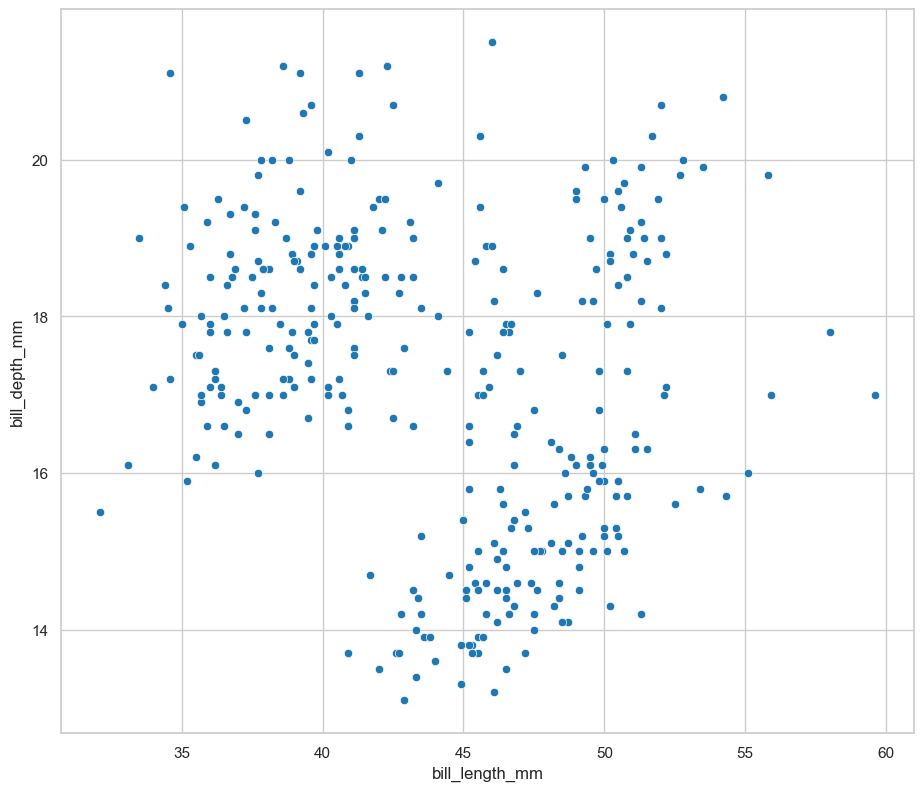

In [120]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

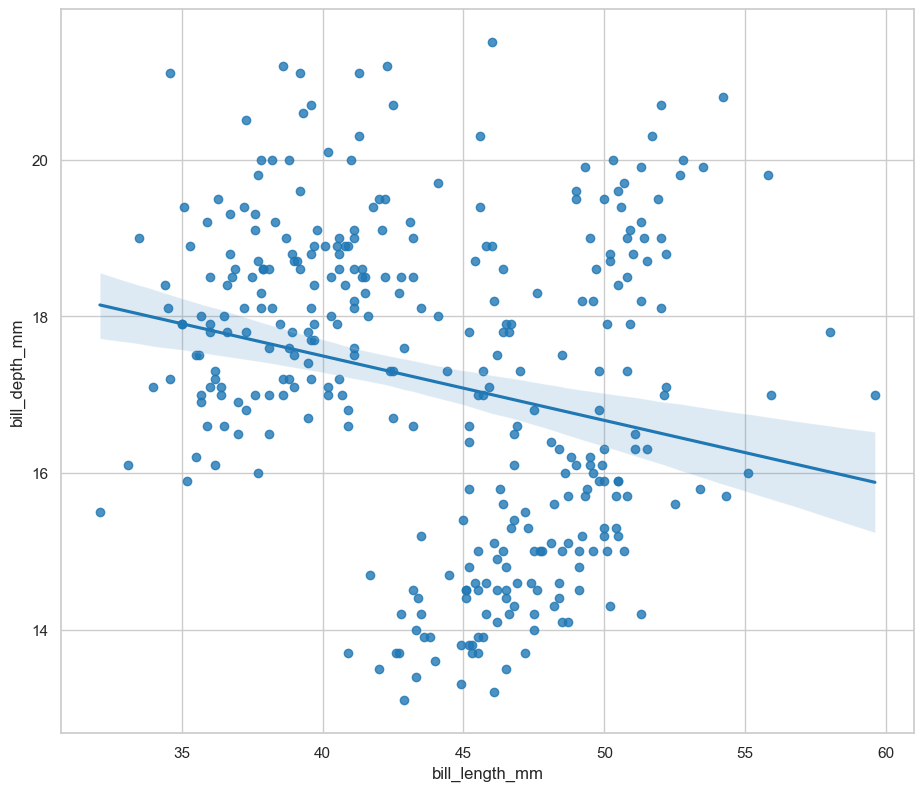

In [121]:
sns.regplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

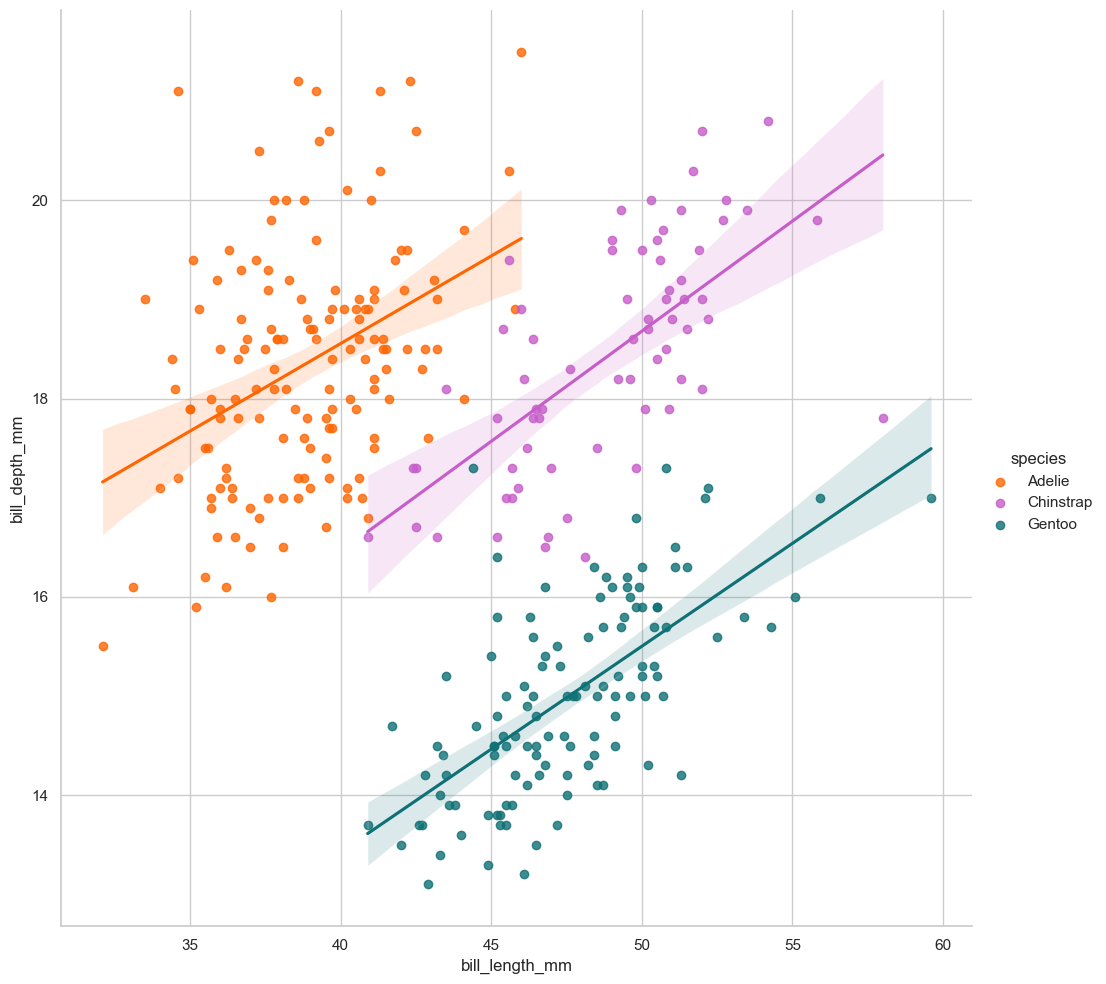

In [122]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

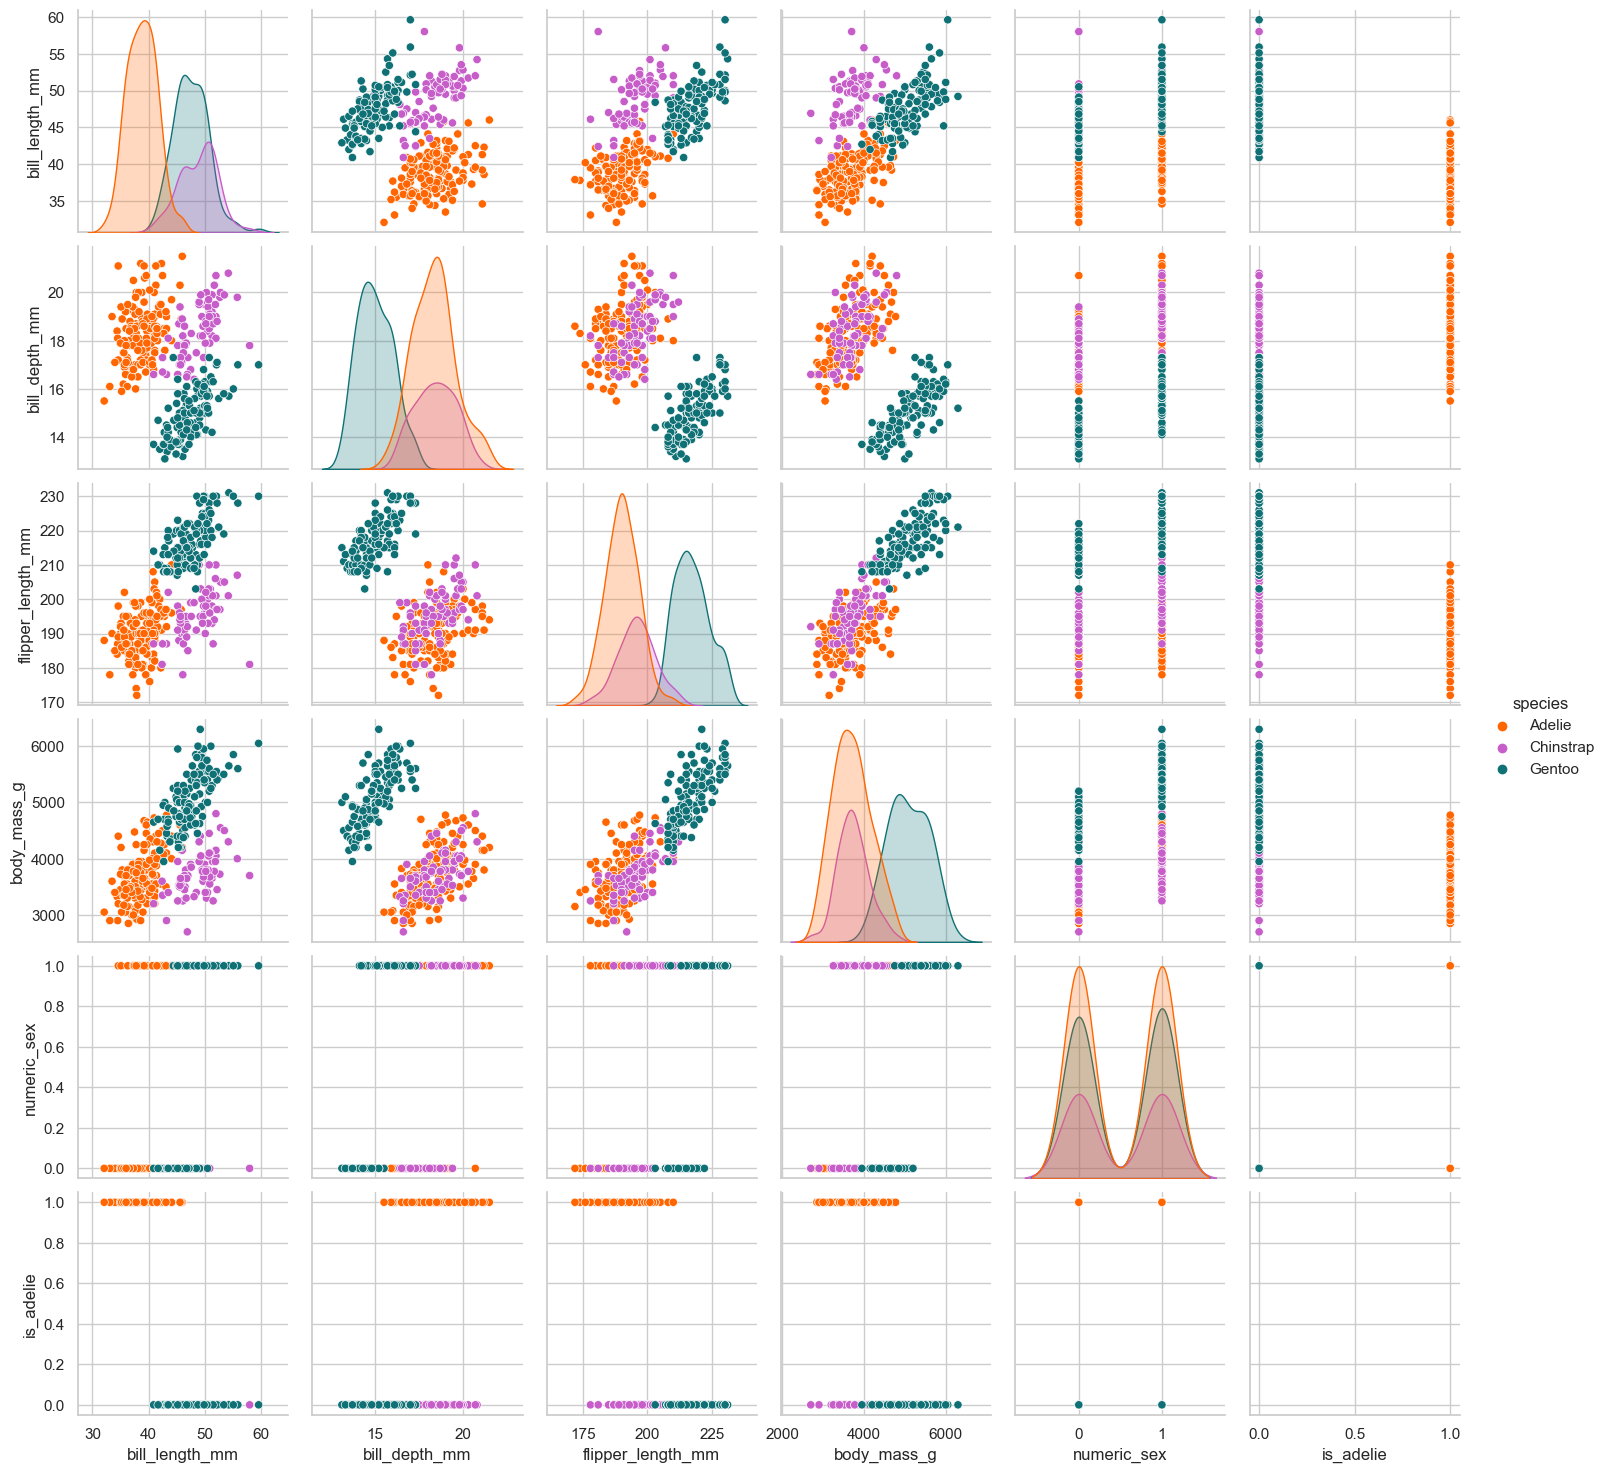

In [123]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)

# **Reducci√≥n de Dimensiones**

Cuando tienes muchas variables en un conjunto de datos, trabajar con ellas puede volverse complejo y computacionalmente costoso. La **reducci√≥n de dimensiones** es una t√©cnica que ayuda a simplificar los datos conservando la mayor cantidad posible de informaci√≥n relevante. Aqu√≠ te explico c√≥mo funciona y las estrategias m√°s comunes:

---

## **¬øPor qu√© reducir dimensiones?**

1. **Evitar la maldici√≥n de la dimensionalidad**:  
   A medida que aumentan las dimensiones, los datos se dispersan y los modelos pueden volverse menos efectivos.

2. **Mejorar la visualizaci√≥n**:  
   Los datos de alta dimensionalidad son dif√≠ciles de interpretar, pero reducirlos a 2 o 3 dimensiones permite graficarlos.

3. **Acelerar el procesamiento**:  
   Menos dimensiones implican menos c√°lculos, lo que mejora la eficiencia computacional.

4. **Eliminar redundancias**:  
   Algunas variables pueden estar correlacionadas, aportando informaci√≥n redundante que puede simplificarse.

---

## **T√©cnicas comunes de reducci√≥n de dimensiones**

### **1. Selecci√≥n de caracter√≠sticas**
En lugar de transformar las variables, seleccionas un subconjunto relevante de las originales.

- **M√©todos estad√≠sticos**: Usar tests de significancia para determinar las variables m√°s importantes.  
- **Modelos predictivos**: √Årboles de decisi√≥n, Random Forest, etc., que eval√∫an la importancia de las variables.  
- **An√°lisis de correlaci√≥n**: Eliminar variables muy correlacionadas entre s√≠.

---

### **2. Extracci√≥n de caracter√≠sticas**
Creas nuevas variables a partir de combinaciones de las existentes, manteniendo la informaci√≥n m√°s relevante.

#### **a. Principal Component Analysis (PCA)**
- Reduce las dimensiones al transformar las variables originales en **componentes principales**.  
- Cada componente principal es una combinaci√≥n lineal de las variables originales, ordenadas por cu√°nta varianza explican.  
- Ideal para datos num√©ricos y escalados.  
- **Ejemplo**: De 10 variables iniciales, puedes quedarte con las 2 primeras componentes principales si explican el 95% de la variabilidad.

#### **b. Linear Discriminant Analysis (LDA)**
- Similar al PCA, pero orientado a maximizar la separaci√≥n entre clases.  
- √ötil en problemas de clasificaci√≥n.

#### **c. t-SNE y UMAP**
- M√©todos no lineales para visualizar datos en 2D o 3D.  
- Capturan relaciones complejas entre variables.

---

### **3. T√©cnicas espec√≠ficas para texto o im√°genes**
- **Latent Semantic Analysis (LSA)**: Extrae temas clave de datos textuales.  
- **Autoencoders**: Redes neuronales que aprenden representaciones comprimidas de los datos.  
- **Convolutional Neural Networks (CNNs)**: Extraen caracter√≠sticas clave de im√°genes.

---

## **Pasos para aplicar reducci√≥n de dimensiones**

1. **Estandariza los datos**:  
   Muchas t√©cnicas, como PCA, requieren que las variables est√©n en la misma escala.

2. **Explora la varianza explicada**:  
   Por ejemplo, en PCA, determina cu√°ntas dimensiones son necesarias para capturar un alto porcentaje de la variabilidad (generalmente ‚â• 90%).

3. **Aplica la t√©cnica**:  
   Usa herramientas como `sklearn` en Python para implementar m√©todos como PCA, LDA o t-SNE.

4. **Eval√∫a el impacto**:  
   Verifica si la reducci√≥n mejora el rendimiento de los modelos o facilita la visualizaci√≥n sin perder precisi√≥n.

# ¬øQue quiero mostrar?

![desc3](imgs/tipos_grafica.jpg)

# Conclusiones

- Las preguntas son la fuente de toda exploraci√≥n  
- Es fundamental, identificar tipos de variables, valores nulos y hacer limpieza  
- Siempre calcula y visualiza los estadisticos con medidas de tendencia central, medidas de  
  distribuci√≥n, medidas de distribuci√≥n probabilistica.  
- Visualiza tus analisis de relaci√≥n bivariable y multivariable.
- Selecciona tu variable o variables objetivo y prueba con diferentes modelos de  
  regresi√≥n. Ya sea lineal simple, lineal multiple o logistica para crear un modelo que pueda predecir datos con buena precisi√≥n.  
- Presentaci√≥n y comunicaci√≥n de los resultados

## Informaci√≥n de sesi√≥n

In [130]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=adabdf4b-8f79-4c9b-8d42-262d9d5eb097' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>